All libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import geopandas as gpd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy.stats as stats


# 1 Data preparation

## 1.1 Getting randomized 1 million row of dataset

In [2]:
# Set the directory path for your data files
directory_path = 'C:/Users/Bolormaa/OneDrive - National College of Ireland/NCI data analyst/sem 3/thesis/x23176725/'

Given the substantial size of the 2022 Home Mortgage Disclosure Act (HMDA) dataset, 
which contains over 16 millions of records, processing the entire dataset 
posed significant computational challenges. 

To address this, I employed a random sampling technique to extract a representative subset of 1 million rows from the dataset.

Note: This code takes so long time to compute.


In [2]:
# # Set the CSV file name
# csv_file_name = '2022_public_lar_csv.csv'

# # Combine the directory path and file name to create the full file path
# csv_file_path = directory_path + csv_file_name

# # Read the entire CSV file
# df = pd.read_csv(csv_file_path)

# random_seed = 42  # Choose any number you like
# df = df.sample(frac=1, random_state=random_seed).reset_index(drop=True)

# # Define the number of chunks
# num_chunks = 16

# # Calculate the size of each chunk
# chunk_size = len(df) // num_chunks

# # Split the DataFrame into 16 chunks and save them
# for i in range(num_chunks):
#     start_index = i * chunk_size
#     # For the last chunk, include all remaining rows
#     if i == num_chunks - 1:
#         end_index = len(df)
#     else:
#         end_index = (i + 1) * chunk_size
    
#     chunk = df.iloc[start_index:end_index]
#     chunk.to_csv(f'chunk_{i}.csv', index=False)
#     print(f'Saved chunk {i+1}')

## 1.2 Load the 1 million row of chunk dataset

In [ ]:
# Set the name of the CSV file
file_name = 'chunk_1.csv'

# Combine the directory path and file name to create the full file path
file_path = directory_path + file_name

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   activity_year                   lei  derived_msa_md state_code  \
0           2022  JJKC32MCHWDI71265Z06           99999         SC   
1           2022  MCXHCL35UUWDZK7NCQ61           33874         PA   
2           2022  03D0JEWFDFUS0SEEKG89           48424         FL   
3           2022  549300YIQ7S7Z8PIHE53           37964         PA   
4           2022  5493007KLU19FK8PG279           23224         MD   

   county_code  census_tract conforming_loan_limit  \
0      45087.0  4.508703e+10                     C   
1      42029.0  4.202930e+10                     C   
2      12099.0  1.209901e+10                     C   
3      42101.0  4.210101e+10                     C   
4      24031.0  2.403170e+10                     C   

       derived_loan_product_type             derived_dwelling_category  \
0  Conventional:Subordinate Lien  Single Family (1-4 Units):Site-Built   
1  Conventional:Subordinate Lien  Single Family (1-4 Units):Site-Built   
2        Conventional:First Lien  Sing

In [ ]:
# Display basic information about the DataFrame
print(df.info())

# Display summary statistics for numerical columns
print(df.describe())

# Display the columns in the DataFrame
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005013 entries, 0 to 1005012
Data columns (total 99 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   activity_year                             1005013 non-null  int64  
 1   lei                                       1005013 non-null  object 
 2   derived_msa_md                            1005013 non-null  int64  
 3   state_code                                993481 non-null   object 
 4   county_code                               986383 non-null   float64
 5   census_tract                              983508 non-null   float64
 6   conforming_loan_limit                     1000424 non-null  object 
 7   derived_loan_product_type                 1005013 non-null  object 
 8   derived_dwelling_category                 1005013 non-null  object 
 9   derived_ethnicity                         1005013 non-null  object 
 10  derive

# 2. Data understanding 

In [ ]:
# Check the distribution of a specific column
print(df['loan_amount'].describe())

count    1.005013e+06
mean     3.614364e+05
std      4.560389e+07
min      5.000000e+03
25%      1.150000e+05
50%      2.250000e+05
75%      3.650000e+05
max      4.568360e+10
Name: loan_amount, dtype: float64


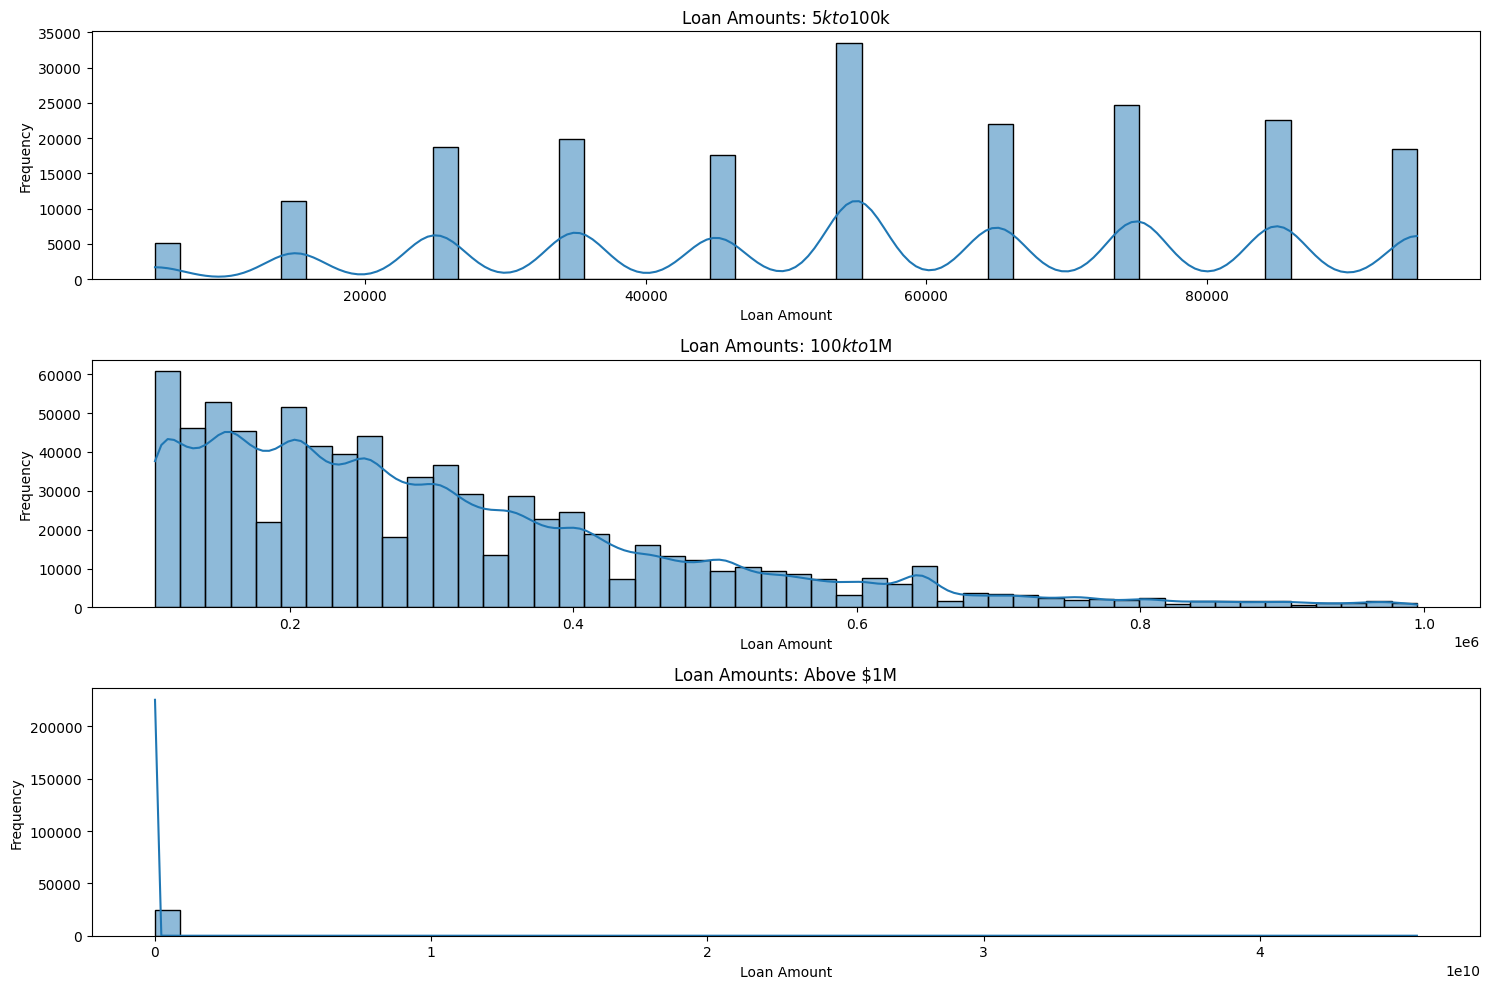

In [ ]:
# Ensure 'loan_amount' column is numeric
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce')

# Filter data into different ranges
range_1 = df[(df['loan_amount'] >= 5000) & (df['loan_amount'] < 100000)]['loan_amount']
range_2 = df[(df['loan_amount'] >= 100000) & (df['loan_amount'] < 1000000)]['loan_amount']
range_3 = df[df['loan_amount'] >= 1000000]['loan_amount']

# Plotting histograms for each range
plt.figure(figsize=(15, 10))

# Range 1: 5k to 100k
plt.subplot(311)
sns.histplot(range_1.dropna(), bins=50, kde=True)
plt.title('Loan Amounts: $5k to $100k')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Range 2: 100k to 1000k (1M)
plt.subplot(312)
sns.histplot(range_2.dropna(), bins=50, kde=True)
plt.title('Loan Amounts: $100k to $1M')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Range 3: Above 1M
plt.subplot(313)
sns.histplot(range_3.dropna(), bins=50, kde=True)
plt.title('Loan Amounts: Above $1M')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


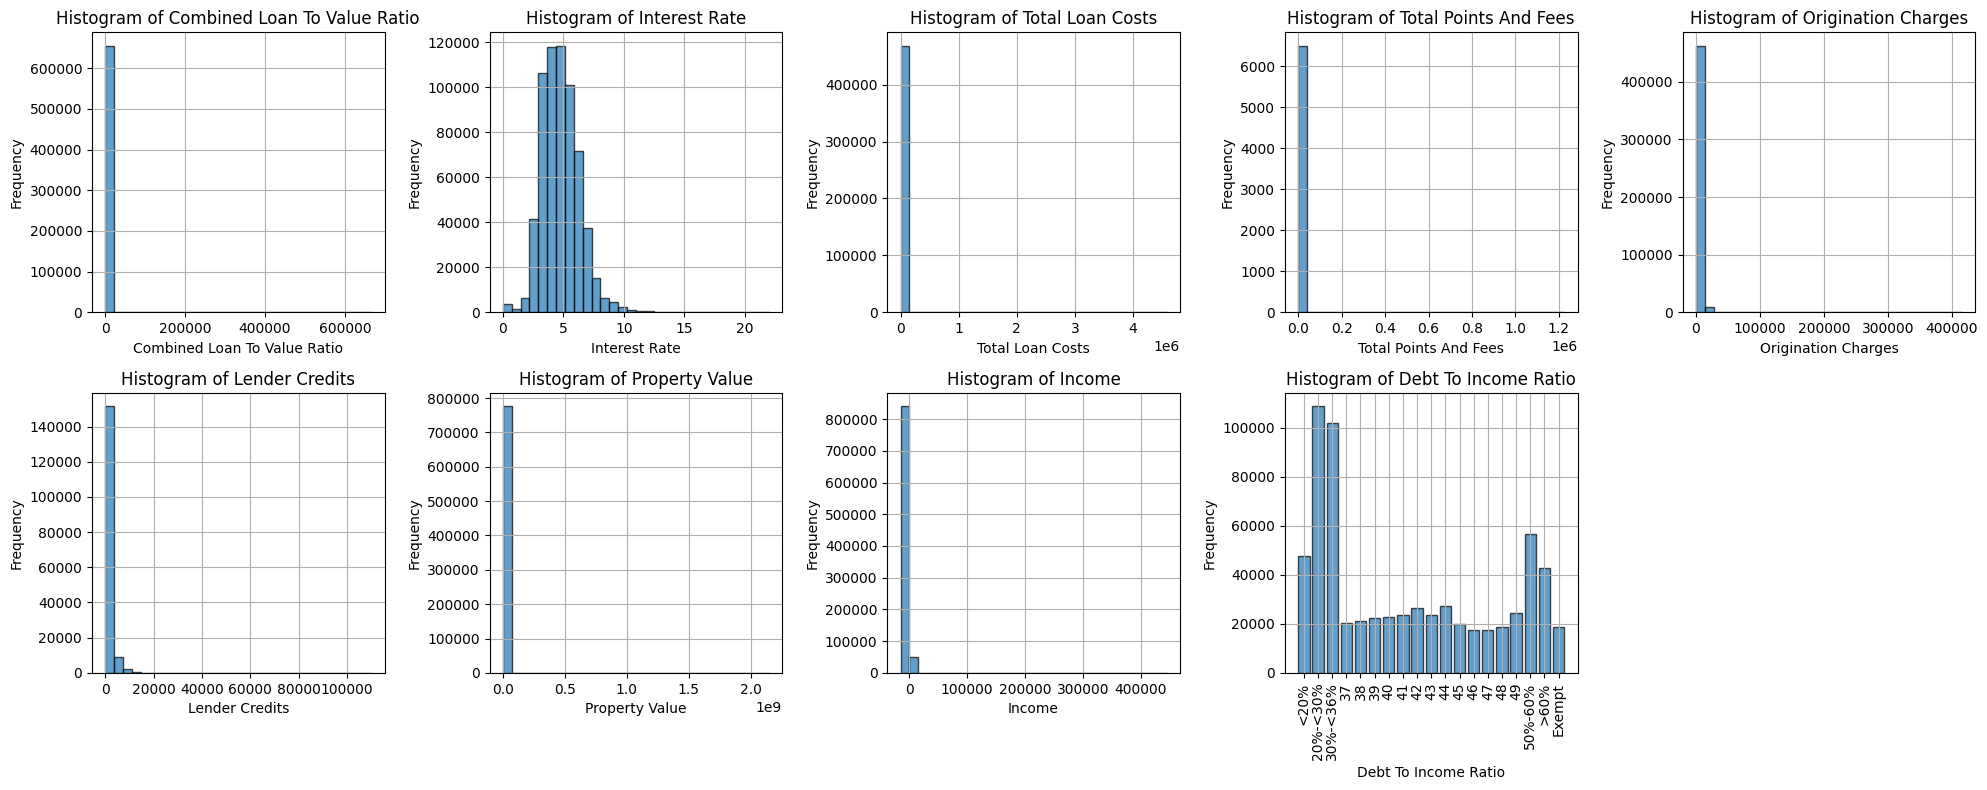


Numeric encoded debt_to_income_ratio column:
0     2.0
1     4.0
2     NaN
3    18.0
4     3.0
5     NaN
6    18.0
7     9.0
8    15.0
9    17.0
Name: debt_to_income_ratio_numeric, dtype: float64

Original debt_to_income_ratio column:
0    20%-<30%
1          37
2         nan
3        >60%
4    30%-<36%
5         nan
6        >60%
7          42
8          48
9     50%-60%
Name: debt_to_income_ratio, dtype: object


In [ ]:
# Define the mapping for debt_to_income_ratio
dti_mapping = {
    '<20%': 1,
    '20%-<30%': 2,
    '30%-<36%': 3,
    '37': 4,
    '38': 5,
    '39': 6,
    '40': 7,
    '41': 8,
    '42': 9,
    '43': 10,
    '44': 11,
    '45': 12,
    '46': 13,
    '47': 14,
    '48': 15,
    '49': 16,
    '50%-60%': 17,
    '>60%': 18,
    'Exempt': 19
}

# Replace any '.0' at the end of numeric strings in debt_to_income_ratio
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].astype(str).str.replace('.0', '', regex=False)

# Convert debt_to_income_ratio to numeric using the mapping
df['debt_to_income_ratio_numeric'] = df['debt_to_income_ratio'].map(dti_mapping)

# Define the numeric columns including the newly created debt_to_income_ratio_numeric
numeric_columns = [
    'combined_loan_to_value_ratio', 'interest_rate', 'total_loan_costs',
    'total_points_and_fees', 'origination_charges', 'lender_credits',
    'property_value', 'income', 'debt_to_income_ratio_numeric'
]

# Convert other columns to numeric, handling any conversion errors
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

num_cols = 5
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))

# Generate histograms for each variable
for i, variable in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    if variable == 'debt_to_income_ratio_numeric':
        # Use original labels for debt_to_income_ratio_numeric
        labels = list(dti_mapping.keys())
        counts = [df[df['debt_to_income_ratio'] == label].shape[0] for label in labels]
        axes[row, col].bar(labels, counts, edgecolor='k', alpha=0.7)
        axes[row, col].set_title('Histogram of Debt To Income Ratio')
        axes[row, col].set_xlabel('Debt To Income Ratio')
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].tick_params(axis='x', rotation=90)
    else:
        axes[row, col].hist(df[variable].dropna(), bins=30, edgecolor='k', alpha=0.7)
        axes[row, col].set_title(f'Histogram of {variable.replace("_", " ").title()}')
        axes[row, col].set_xlabel(variable.replace("_", " ").title())
        axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)

# Remove any extra empty subplots
for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()

# Print the first 10 rows of the original and numeric encoded columns to check
print("\nNumeric encoded debt_to_income_ratio column:")
print(df['debt_to_income_ratio_numeric'].head(10))

print("\nOriginal debt_to_income_ratio column:")
print(df['debt_to_income_ratio'].head(10))


In [ ]:
print(df['debt_to_income_ratio'].unique())

['20%-<30%' '37' 'nan' '>60%' '30%-<36%' '42' '48' '50%-60%' '45' '46'
 '<20%' '39' '38' '49' '44' '43' 'Exempt' '40' '41' '47' '36']


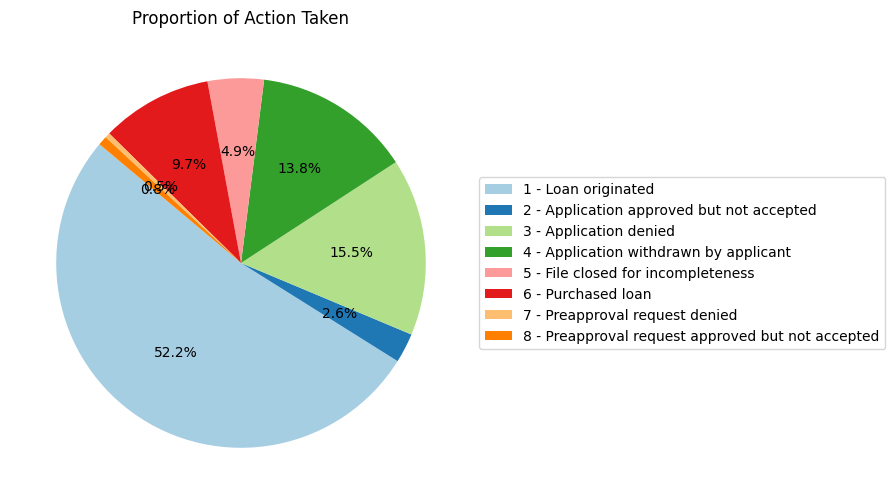

In [ ]:
# Action taken descriptions
action_descriptions = {
    1: 'Loan originated',
    2: 'Application approved but not accepted',
    3: 'Application denied',
    4: 'Application withdrawn by applicant',
    5: 'File closed for incompleteness',
    6: 'Purchased loan',
    7: 'Preapproval request denied',
    8: 'Preapproval request approved but not accepted'
}

# Count occurrences and sort
action_counts = df['action_taken'].value_counts().sort_index()

# Prepare labels and data in sorted order
action_labels = [f"{action} - {action_descriptions[action]}" for action in action_counts.index]
action_sizes = action_counts.values

# Pie chart for action_taken
plt.figure(figsize=(10, 6))
plt.pie(action_sizes, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(action_labels))))

# Create legend with action descriptions and corresponding colors
plt.legend(action_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Proportion of Action Taken')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


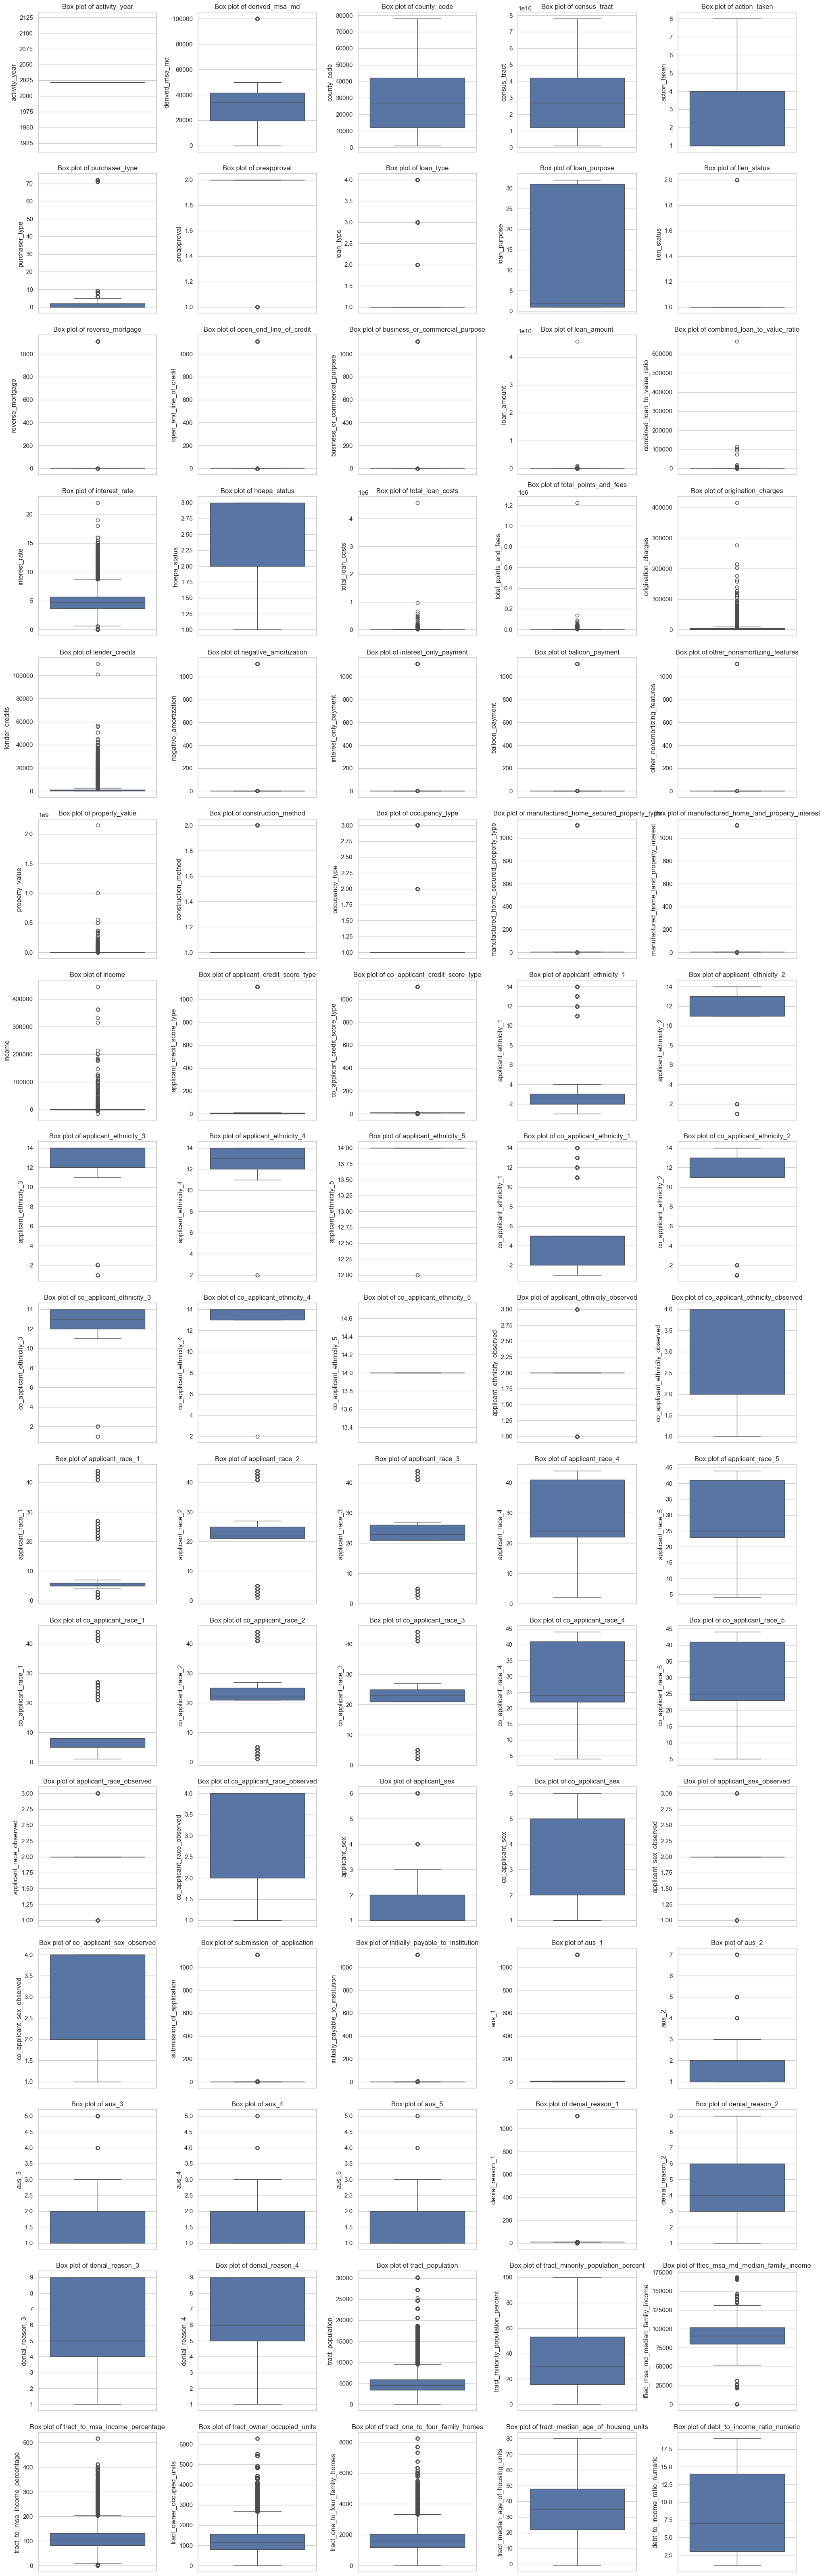

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Identify all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define the number of plots per row
plots_per_row = 5
total_plots = len(numeric_cols)

# Calculate the number of rows needed
rows = (total_plots // plots_per_row) + int(total_plots % plots_per_row != 0)

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 4 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])  # Use y to plot vertically
    axes[i].set_title(f'Box plot of {col}')

# Hide any unused subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\359936449.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_originated_loans['loan_purpose_desc'] = filtered_originated_loans['loan_purpose'].map(loan_purpose_map)


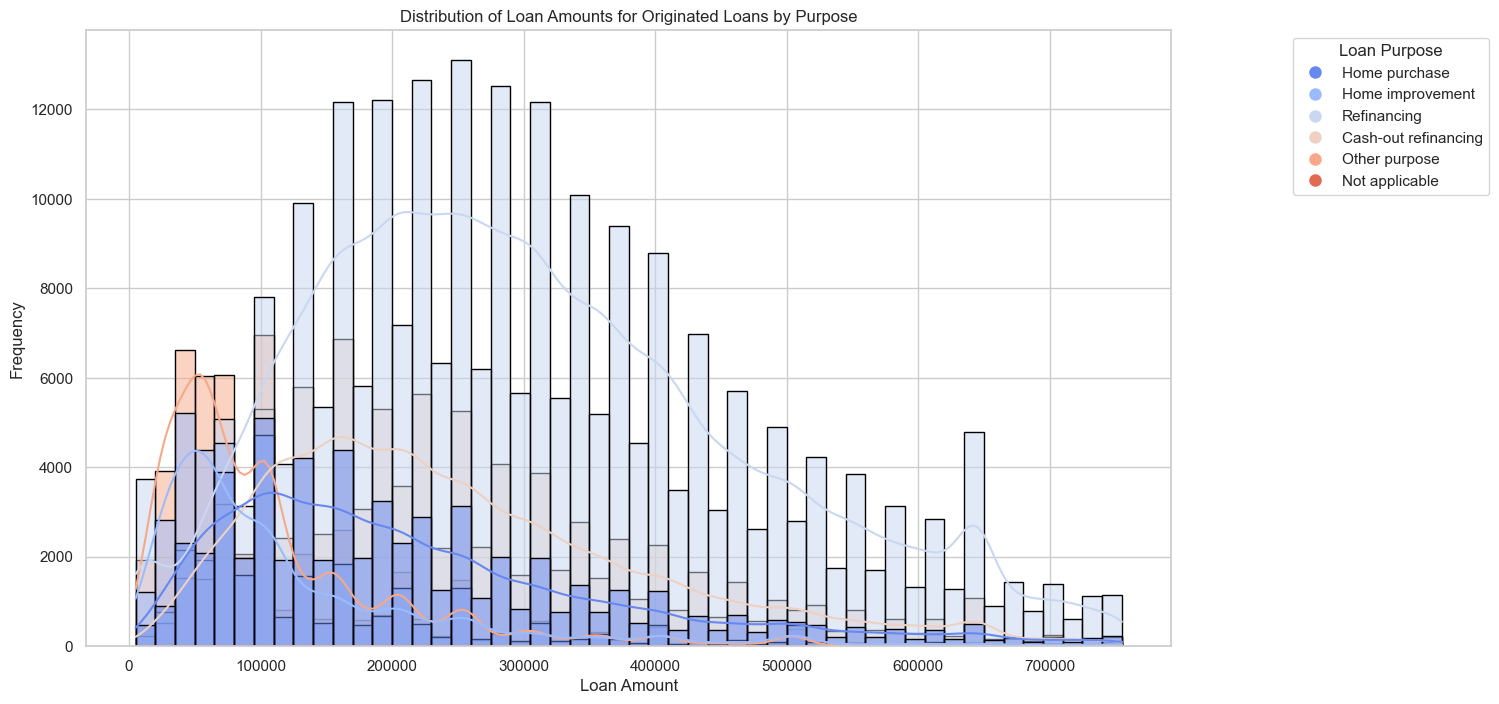

In [ ]:
# Convert loan_amount to numeric
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce')

# Filter the data for originated loans only
originated_loans = df[df['action_taken'] == 1]  # 1 indicates 'Loan originated'

# Filter out extreme loan amounts
upper_limit = originated_loans['loan_amount'].quantile(0.95)
filtered_originated_loans = originated_loans[originated_loans['loan_amount'] <= upper_limit]

# Map loan purpose codes to descriptions
loan_purpose_map = {
    1: 'Home purchase',
    2: 'Home improvement',
    31: 'Refinancing',
    32: 'Cash-out refinancing',
    4: 'Other purpose',
    5: 'Not applicable'
}

filtered_originated_loans['loan_purpose_desc'] = filtered_originated_loans['loan_purpose'].map(loan_purpose_map)

# Create a color palette
palette = sns.color_palette("coolwarm", len(loan_purpose_map))

# Plot the loan amounts for originated loans by purpose
plt.figure(figsize=(14, 8))
sns.histplot(data=filtered_originated_loans, x='loan_amount', hue='loan_purpose_desc', bins=50, palette=palette, edgecolor='black', kde=True)
plt.title('Distribution of Loan Amounts for Originated Loans by Purpose')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10, label=desc)
           for i, desc in enumerate(loan_purpose_map.values())]

plt.legend(title='Loan Purpose', handles=handles, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()


# 3. Data Preprocessing

## 3.1 Handling missing values

In [ ]:
# Check for missing values across all variables
missing_values = df.isna().sum()

# Filter variables with missing values
variables_with_missing_values = missing_values[missing_values > 0]

print("Variables with Missing Values:")
print(variables_with_missing_values)



Variables with Missing Values:
state_code                        11532
county_code                       18630
census_tract                      21505
conforming_loan_limit              4589
combined_loan_to_value_ratio     349263
interest_rate                    366908
rate_spread                      494884
total_loan_costs                 536594
total_points_and_fees            998504
origination_charges              532117
discount_points                  735568
lender_credits                   841345
loan_term                         17040
prepayment_penalty_term          947809
intro_rate_period                792999
property_value                   228424
multifamily_affordable_units     982952
income                           113581
applicant_ethnicity_1               425
applicant_ethnicity_2            949461
applicant_ethnicity_3           1003967
applicant_ethnicity_4           1004988
applicant_ethnicity_5           1005004
co_applicant_ethnicity_1            116
co_applic

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)


activity_year                         0.000000
lei                                   0.000000
derived_msa_md                        0.000000
state_code                            1.147448
county_code                           1.853707
                                       ...    
tract_to_msa_income_percentage        0.000000
tract_owner_occupied_units            0.000000
tract_one_to_four_family_homes        0.000000
tract_median_age_of_housing_units     0.000000
debt_to_income_ratio_numeric         34.172493
Length: 100, dtype: float64


In [ ]:
# List of columns to remove
columns_to_remove = ['activity_year', 'interest_only_payment', 'balloon_payment', 'other_nonamortizing_features',
                     'co_applicant_credit_score_type', 'applicant_ethnicity_2', 'applicant_ethnicity_3', 
                     'applicant_ethnicity_4', 'applicant_ethnicity_5', 'co_applicant_ethnicity_2', 
                     'co_applicant_ethnicity_3', 'co_applicant_ethnicity_4', 'co_applicant_ethnicity_5', 
                     'applicant_race_2', 'applicant_race_3', 'applicant_race_4', 'applicant_race_5', 
                     'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5', 
                     'aus_1', 'aus_2', 'aus_3', 'aus_4', 'aus_5', 'denial_reason_2', 'denial_reason_3', 'denial_reason_4', 
                     'census_tract','lei','open_end_line_of_credit','multifamily_affordable_units','applicant_age_above_62', 
                     'co_applicant_age_above_62','prepayment_penalty_term','total_points_and_fees', 'derived_sex','derived_ethnicity', 'derived_race']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Display the number of variables after removal
num_variables_after_removal = df.shape[1]
print("Number of variables after removal:", num_variables_after_removal)


Number of variables after removal: 60


In [ ]:
# List of columns to convert
columns_to_convert = [
    'combined_loan_to_value_ratio', 'interest_rate', 'rate_spread',
    'total_loan_costs', 'origination_charges',
    'discount_points', 'lender_credits', 'loan_term', 
    'intro_rate_period', 'property_value',
]

# Convert columns to numeric, setting errors='coerce' to handle missing values by converting them to NaN
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Check the data types to ensure conversion
print(df.interest_rate.dtypes)

float64


In [ ]:
# Display data types of each column
print(df.dtypes)


derived_msa_md                                int64
state_code                                   object
county_code                                 float64
conforming_loan_limit                        object
derived_loan_product_type                    object
derived_dwelling_category                    object
action_taken                                  int64
purchaser_type                                int64
preapproval                                   int64
loan_type                                     int64
loan_purpose                                  int64
lien_status                                   int64
reverse_mortgage                              int64
business_or_commercial_purpose                int64
loan_amount                                   int64
combined_loan_to_value_ratio                float64
interest_rate                               float64
rate_spread                                 float64
hoepa_status                                  int64
total_loan_c

Converting applicant age to numeric

In [ ]:
print(df.applicant_age.dtypes)

object


In [ ]:
print(df['applicant_age'].unique())


['45-54' '35-44' '8888' '>74' '55-64' '25-34' '65-74' '<25']


In [ ]:
# Define the mapping from age ranges to numeric values
age_mapping = {
    '<25': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65-74': 6,
    '>74': 7,
    np.nan: np.nan  # Ensuring NaN values remain as NaN
}

# Replace '8888' with NaN
df['applicant_age'] = df['applicant_age'].replace('8888', np.nan)

# Convert age ranges to numeric using the mapping
df['applicant_age_numeric'] = df['applicant_age'].map(age_mapping)

# Print the first 10 rows of the applicant_age_numeric column
print("\nFirst 10 rows of applicant_age_numeric column:")
print(df['applicant_age_numeric'].head(10))

print(df['applicant_age'].head(10))



First 10 rows of applicant_age_numeric column:
0    4.0
1    3.0
2    NaN
3    4.0
4    4.0
5    7.0
6    4.0
7    7.0
8    4.0
9    5.0
Name: applicant_age_numeric, dtype: float64
0    45-54
1    35-44
2      NaN
3    45-54
4    45-54
5      >74
6    45-54
7      >74
8    45-54
9    55-64
Name: applicant_age, dtype: object


Converting co applicant age to numeric

In [ ]:
# Define the mapping from age ranges to numeric values
age_mapping = {
    '<25': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65-74': 6,
    '>74': 7,
    np.nan: np.nan  # Ensuring NaN values remain as NaN
}

# Replace '8888' and '9999' with NaN for co_applicant_age
df['co_applicant_age'] = df['co_applicant_age'].replace(['8888', '9999'], np.nan)

# Convert age ranges to numeric for co_applicant_age using the mapping
df['co_applicant_age_numeric'] = df['co_applicant_age'].map(age_mapping)

print("\nFirst 10 rows of co_applicant_age_numeric column:")
print(df['co_applicant_age_numeric'].head(10))

print("\nFirst 10 rows of the original co_applicant_age column:")
print(df['co_applicant_age'].head(10))



First 10 rows of co_applicant_age_numeric column:
0    NaN
1    3.0
2    NaN
3    NaN
4    NaN
5    7.0
6    5.0
7    7.0
8    NaN
9    4.0
Name: co_applicant_age_numeric, dtype: float64

First 10 rows of the original co_applicant_age column:
0      NaN
1    35-44
2      NaN
3      NaN
4      NaN
5      >74
6    55-64
7      >74
8      NaN
9    45-54
Name: co_applicant_age, dtype: object


Converting debt to income ratio to numeric

In [ ]:
# Define the mapping for debt_to_income_ratio
dti_mapping = {
    '<20%': 1,
    '20%-<30%': 2,
    '30%-<36%': 3,
    '37': 4,
    '38': 5,
    '39': 6,
    '40': 7,
    '41': 8,
    '42': 9,
    '43': 10,
    '44': 11,
    '45': 12,
    '46': 13,
    '47': 14,
    '48': 15,
    '49': 16,
    '50%-60%': 17,
    '>60%': 18,
    'Exempt': 19
}

# Replace any '.0' at the end of numeric strings in debt_to_income_ratio
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].astype(str).str.replace('.0', '', regex=False)

# Convert debt_to_income_ratio to numeric using the mapping
df['debt_to_income_ratio_numeric'] = df['debt_to_income_ratio'].map(dti_mapping)

In [ ]:
# List of columns to convert
columns_to_convert1 = ['applicant_age_numeric','co_applicant_age_numeric']

# Convert columns to numeric, setting errors='coerce' to handle missing values by converting them to NaN
for column in columns_to_convert1:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Check the data types to ensure conversion
print(df.dtypes)

derived_msa_md                         int64
state_code                            object
county_code                          float64
conforming_loan_limit                 object
derived_loan_product_type             object
                                      ...   
tract_one_to_four_family_homes         int64
tract_median_age_of_housing_units      int64
debt_to_income_ratio_numeric         float64
applicant_age_numeric                float64
co_applicant_age_numeric             float64
Length: 62, dtype: object


Label encoding for categorical variables

In [ ]:
print(df.dtypes)

derived_msa_md                         int64
state_code                            object
county_code                          float64
conforming_loan_limit                 object
derived_loan_product_type             object
                                      ...   
tract_one_to_four_family_homes         int64
tract_median_age_of_housing_units      int64
debt_to_income_ratio_numeric         float64
applicant_age_numeric                float64
co_applicant_age_numeric             float64
Length: 62, dtype: object


In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# List of columns you want to encode
columns_to_encode = [
    'state_code','total_units',
    'conforming_loan_limit', 
    'derived_loan_product_type', 
    'derived_dwelling_category', 
]

# Applying label encoding to each column
for column in columns_to_encode:
    df[column + '_encoded'] = le.fit_transform(df[column])
    # Optionally, to replace the original columns with encoded ones:
    # df[column] = le.fit_transform(df[column])

# Show the first few rows of the DataFrame to confirm changes
print(df.head())



   derived_msa_md state_code  county_code conforming_loan_limit  \
0           99999         SC      45087.0                     C   
1           33874         PA      42029.0                     C   
2           48424         FL      12099.0                     C   
3           37964         PA      42101.0                     C   
4           23224         MD      24031.0                     C   

       derived_loan_product_type             derived_dwelling_category  \
0  Conventional:Subordinate Lien  Single Family (1-4 Units):Site-Built   
1  Conventional:Subordinate Lien  Single Family (1-4 Units):Site-Built   
2        Conventional:First Lien  Single Family (1-4 Units):Site-Built   
3                 FHA:First Lien  Single Family (1-4 Units):Site-Built   
4        Conventional:First Lien  Single Family (1-4 Units):Site-Built   

   action_taken  purchaser_type  preapproval  loan_type  ...  \
0             1               0            2          1  ...   
1             1         

In [ ]:
# Check for missing values across all variables
missing_values = df.isna().sum()

# Filter variables with missing values
variables_with_missing_values = missing_values[missing_values > 0]

print("Variables with Missing Values:")
print(variables_with_missing_values)

Variables with Missing Values:
state_code                       11532
county_code                      18630
conforming_loan_limit             4589
combined_loan_to_value_ratio    349263
interest_rate                   366908
rate_spread                     513668
total_loan_costs                536594
origination_charges             532117
discount_points                 754646
lender_credits                  841345
loan_term                        35951
intro_rate_period               811953
property_value                  228424
income                          113581
applicant_ethnicity_1              425
co_applicant_ethnicity_1           116
applicant_race_1                   192
co_applicant_race_1                 49
applicant_age                   104115
co_applicant_age                634611
debt_to_income_ratio_numeric    343438
applicant_age_numeric           104115
co_applicant_age_numeric        634611
dtype: int64


In [ ]:
# List of columns with missing values to remove
columns_with_missing_values = ['state_code', 'county_code',
                               'applicant_ethnicity_1', 'co_applicant_ethnicity_1', 
                               'applicant_race_1', 'co_applicant_race_1','conforming_loan_limit' ]

# Remove rows with missing values in the specified columns
df = df.dropna(subset=columns_with_missing_values)

# Check the shape of the DataFrame after removal
print("Shape of DataFrame after removing rows with missing values:", df.shape)


Shape of DataFrame after removing rows with missing values: (981098, 67)


In [ ]:
# Check for missing values across all variables
missing_values = df.isna().sum() + df.isnull().sum()

# Filter variables with missing values
variables_with_missing_values = missing_values[missing_values > 0]

print("Variables with Missing Values:")
print(variables_with_missing_values)

Variables with Missing Values:
combined_loan_to_value_ratio     683288
interest_rate                    708750
rate_spread                      988304
total_loan_costs                1026244
origination_charges             1017318
discount_points                 1461820
lender_credits                  1635126
loan_term                         67214
intro_rate_period               1583028
property_value                   440738
income                           214360
applicant_age                    196626
co_applicant_age                1235326
debt_to_income_ratio_numeric     668762
applicant_age_numeric            196626
co_applicant_age_numeric        1235326
dtype: int64


In [ ]:
# Print data types of variables with missing values
print("\nData types of variables with missing values:")
for col in variables_with_missing_values.index:
    print(f"{col}: {df[col].dtype}")



Data types of variables with missing values:
combined_loan_to_value_ratio: float64
interest_rate: float64
rate_spread: float64
total_loan_costs: float64
origination_charges: float64
discount_points: float64
lender_credits: float64
loan_term: float64
intro_rate_period: float64
property_value: float64
income: float64
applicant_age: object
co_applicant_age: object
debt_to_income_ratio_numeric: float64
applicant_age_numeric: float64
co_applicant_age_numeric: float64


Distribution of Variables that have missing values 

In [ ]:
columns_to_convert = [
    'combined_loan_to_value_ratio', 'interest_rate', 'rate_spread',
    'total_loan_costs', 'origination_charges', 'income',
    'discount_points', 'lender_credits', 'loan_term', 
    'intro_rate_period', 'property_value', 'applicant_age_numeric',
    'co_applicant_age_numeric', 'debt_to_income_ratio_numeric'
]

for column in columns_to_convert:
    print(f"\nDistribution of {column}:")
    print(df[column].describe())


Distribution of combined_loan_to_value_ratio:
count    639454.000000
mean         75.250729
std         868.814561
min           0.011000
25%          60.430000
50%          78.132000
75%          90.000000
max      666000.000000
Name: combined_loan_to_value_ratio, dtype: float64

Distribution of interest_rate:
count    626723.000000
mean          4.775179
std           1.538534
min           0.000000
25%           3.690000
50%           4.750000
75%           5.715000
max          21.990000
Name: interest_rate, dtype: float64

Distribution of rate_spread:
count    486946.000000
mean          0.409832
std           1.858649
min        -968.000000
25%          -0.110000
50%           0.362000
75%           0.886000
max         100.101000
Name: rate_spread, dtype: float64

Distribution of total_loan_costs:
count    4.679760e+05
mean     6.949478e+03
std      9.073029e+03
min      0.000000e+00
25%      3.442323e+03
50%      5.576390e+03
75%      9.039958e+03
max      4.579017e+06
Name: t

Note: For only variables that have missing values
Creating histograms to see their distribution

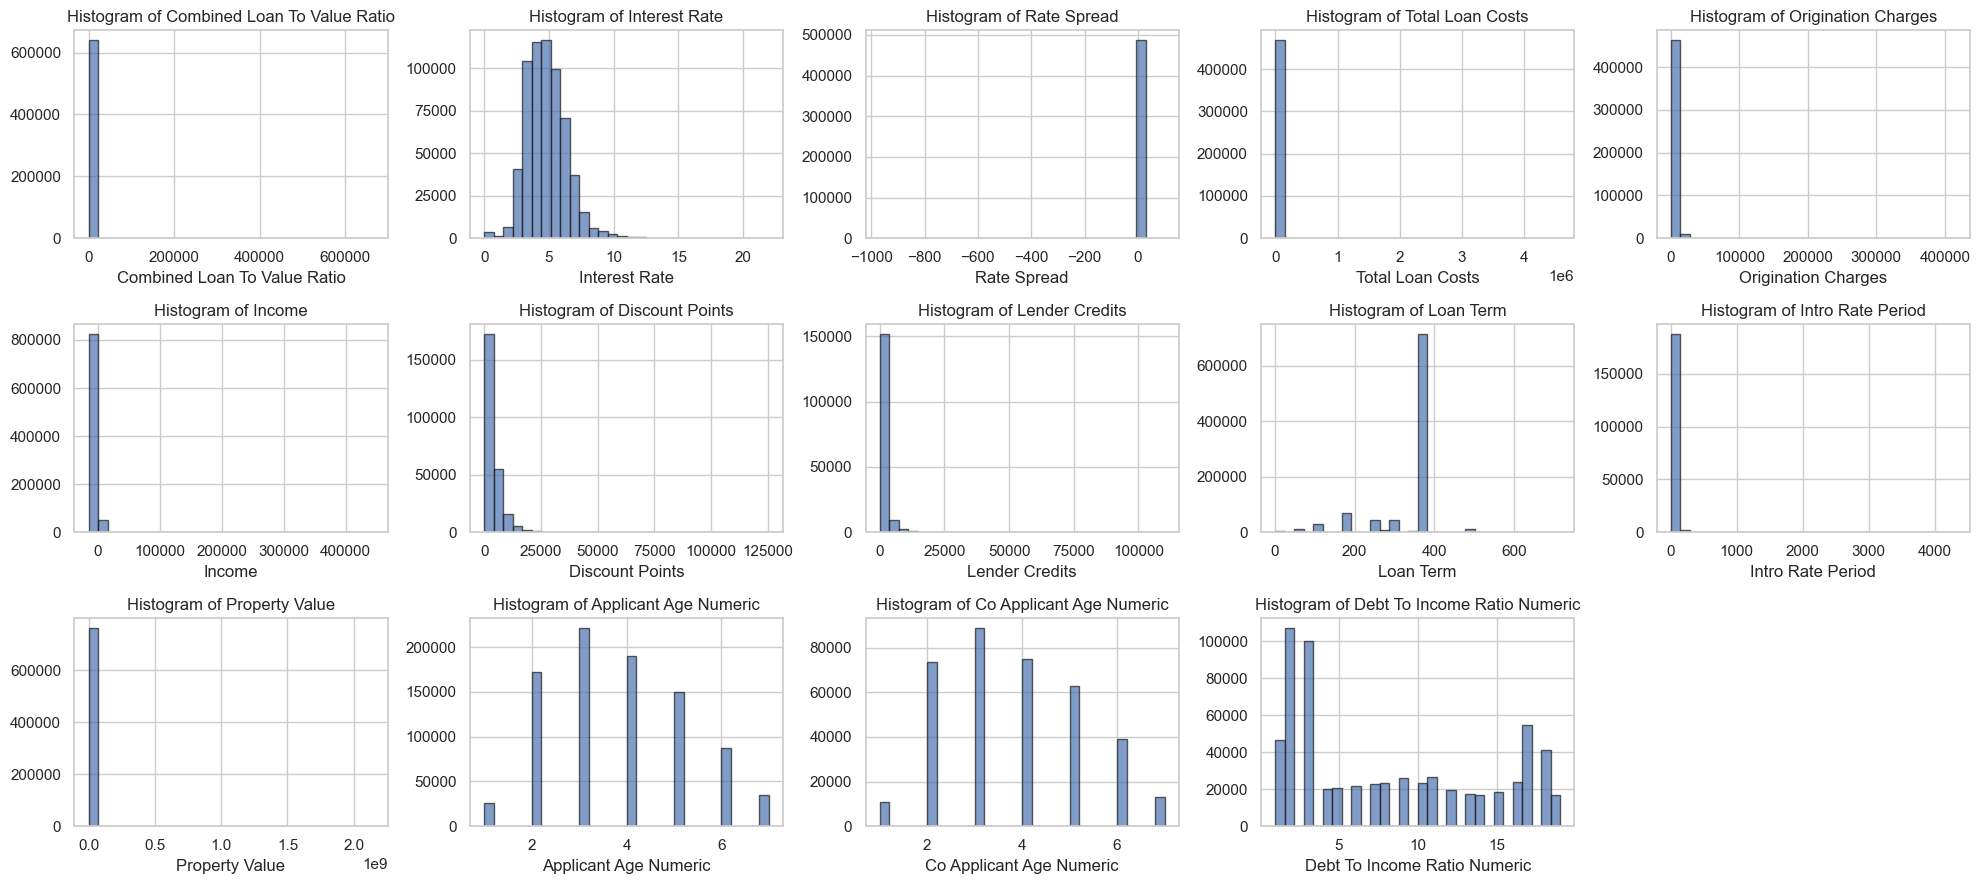

In [ ]:
# Number of variables
columns_to_convert = [
    'combined_loan_to_value_ratio', 'interest_rate', 'rate_spread',
    'total_loan_costs', 'origination_charges', 'income',
    'discount_points', 'lender_credits', 'loan_term', 
    'intro_rate_period', 'property_value', 'applicant_age_numeric',
    'co_applicant_age_numeric', 'debt_to_income_ratio_numeric'
]
num_vars = len(columns_to_convert)
num_rows, num_cols = (num_vars + 4) // 5, 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3 * num_rows))  # Adjust the height as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, variable in enumerate(columns_to_convert):
    data = df[variable].dropna()  # Drop NaN values for histogram plotting
    if data.empty:
        axes[i].text(0.5, 0.5, 'All values are NaN', horizontalalignment='center', verticalalignment='center',
                     transform=axes[i].transAxes)
        axes[i].set_title(f'Histogram of {variable.replace("_", " ").title()}')
        axes[i].set_xlabel(variable.replace("_", " ").title())
    else:
        axes[i].hist(data, bins=30, edgecolor='k', alpha=0.7)
        axes[i].set_title(f'Histogram of {variable.replace("_", " ").title()}')
        axes[i].set_xlabel(variable.replace("_", " ").title())

# Hide unused axes if there are any
for ax in axes[len(columns_to_convert):]:
    ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Check the data types of all columns
print(df.dtypes)


derived_msa_md                         int64
state_code                            object
county_code                          float64
conforming_loan_limit                 object
derived_loan_product_type             object
                                      ...   
state_code_encoded                     int32
total_units_encoded                    int32
conforming_loan_limit_encoded          int32
derived_loan_product_type_encoded      int32
derived_dwelling_category_encoded      int32
Length: 67, dtype: object


Creating correlation matrix to know what variable is correlated to variables that have missing values

In [ ]:
# Variables with missing values
variables_with_missing = [
    'combined_loan_to_value_ratio', 'interest_rate', 'rate_spread',
    'total_loan_costs', 'origination_charges', 'discount_points',
    'lender_credits', 'loan_term', 'intro_rate_period', 'property_value',
    'applicant_age_numeric', 'co_applicant_age_numeric', 'debt_to_income_ratio_numeric', 'income'
]

# Calculate the correlation matrix for all numeric columns
all_numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = all_numeric_df.corr(method='spearman')

# Thresholds for categorizing correlations
moderate_threshold = 0.3
strong_threshold = 0.5

# Function to categorize correlations
def categorize_correlations(var, matrix):
    """
    Categorizes correlations of 'var' with other variables into 'moderate' and 'strong'.
    Returns a tuple of Series (moderate_correlations, strong_correlations).
    """
    if var in matrix.index:
        correlations = matrix[var].drop(var, errors='ignore')  # Exclude self-correlation
        moderate_correlations = correlations[(abs(correlations) >= moderate_threshold) & (abs(correlations) < strong_threshold)]
        strong_correlations = correlations[abs(correlations) >= strong_threshold]
        return (moderate_correlations, strong_correlations)
    else:
        return (pd.Series([], name=var), pd.Series([], name=var))

# Print potential predictors for each variable with missing data, categorized by correlation strength
print("Predictors for regression-based imputation based on correlations:")
for variable in variables_with_missing:
    moderate, strong = categorize_correlations(variable, correlation_matrix)
    print(f"\n{variable}:")
    print("Moderate Correlations:")
    print(moderate if not moderate.empty else "None")
    print("Strong Correlations:")
    print(strong if not strong.empty else "None")


Predictors for regression-based imputation based on correlations:

combined_loan_to_value_ratio:
Moderate Correlations:
loan_type                   0.387179
loan_purpose               -0.482211
applicant_age_numeric      -0.415440
co_applicant_age_numeric   -0.395432
Name: combined_loan_to_value_ratio, dtype: float64
Strong Correlations:
None

interest_rate:
Moderate Correlations:
rate_spread    0.424062
Name: interest_rate, dtype: float64
Strong Correlations:
None

rate_spread:
Moderate Correlations:
interest_rate     0.424062
property_value   -0.301028
Name: rate_spread, dtype: float64
Strong Correlations:
None

total_loan_costs:
Moderate Correlations:
loan_type      0.356250
lien_status   -0.318331
loan_amount    0.439987
loan_term      0.342446
Name: total_loan_costs, dtype: float64
Strong Correlations:
origination_charges    0.767084
discount_points        0.690891
Name: total_loan_costs, dtype: float64

origination_charges:
Moderate Correlations:
None
Strong Correlations:
total_l

Impute missing values based on their distribution

In [ ]:
# Function to perform safe prediction with regression models
def safe_predict(model, X):
    if not X.empty:
        return model.predict(X)
    else:
        return pd.Series(dtype=float)

# Assuming df is your DataFrame

# Check initial missing values
print("Initial missing values:")
print(df.isna().sum())

# Median Imputation for skewed or non-normally distributed variables
columns_to_median_impute = [
    'combined_loan_to_value_ratio', 'rate_spread',
    'lender_credits', 'intro_rate_period', 'debt_to_income_ratio_numeric'
]

for col in columns_to_median_impute:
    if df[col].isna().any():
        df[col].fillna(df[col].median(), inplace=True)

# Mean Imputation for normally distributed variable
if df['interest_rate'].isna().any():
    df['interest_rate'].fillna(df['interest_rate'].mean(), inplace=True)

# Mode Imputation for loan term
loan_term_mode = df['loan_term'].mode()[0]
df['loan_term'].fillna(loan_term_mode, inplace=True)

# Regression Imputation for 'Total Loan Costs' with 'Origination Charges' and 'Discount Points'
total_loan_costs_train = df.dropna(subset=['total_loan_costs', 'origination_charges', 'discount_points'])
if not total_loan_costs_train.empty:
    X_tlc = total_loan_costs_train[['origination_charges', 'discount_points']]
    y_tlc = total_loan_costs_train['total_loan_costs']
    model_tlc = LinearRegression()
    model_tlc.fit(X_tlc, y_tlc)

    # Impute missing 'Total Loan Costs'
    missing_total_loan_costs = df['total_loan_costs'].isna() & df[['origination_charges', 'discount_points']].notna().all(axis=1)
    X_missing_tlc = df.loc[missing_total_loan_costs, ['origination_charges', 'discount_points']]
    df.loc[missing_total_loan_costs, 'total_loan_costs'] = safe_predict(model_tlc, X_missing_tlc)

# Regression Imputation for 'Origination Charges' using 'Total Loan Costs' and 'Discount Points'
origination_charges_train = df.dropna(subset=['origination_charges', 'total_loan_costs', 'discount_points'])
if not origination_charges_train.empty:
    X_oc = origination_charges_train[['total_loan_costs', 'discount_points']]
    y_oc = origination_charges_train['origination_charges']
    model_oc = LinearRegression()
    model_oc.fit(X_oc, y_oc)

    # Impute missing 'Origination Charges'
    missing_origination_charges = df['origination_charges'].isna() & df[['total_loan_costs', 'discount_points']].notna().all(axis=1)
    X_missing_oc = df.loc[missing_origination_charges, ['total_loan_costs', 'discount_points']]
    df.loc[missing_origination_charges, 'origination_charges'] = safe_predict(model_oc, X_missing_oc)

# Regression Imputation for 'Discount Points' using 'Total Loan Costs' and 'Origination Charges'
discount_points_train = df.dropna(subset=['discount_points', 'total_loan_costs', 'origination_charges'])
if not discount_points_train.empty:
    X_dp = discount_points_train[['total_loan_costs', 'origination_charges']]
    y_dp = discount_points_train['discount_points']
    model_dp = LinearRegression()
    model_dp.fit(X_dp, y_dp)

    # Impute missing 'Discount Points'
    missing_discount_points = df['discount_points'].isna() & df[['total_loan_costs', 'origination_charges']].notna().all(axis=1)
    X_missing_dp = df.loc[missing_discount_points, ['total_loan_costs', 'origination_charges']]
    df.loc[missing_discount_points, 'discount_points'] = safe_predict(model_dp, X_missing_dp)

# Fallback using median for 'total_loan_costs', 'origination_charges', and 'discount_points'
for col in ['total_loan_costs', 'origination_charges', 'discount_points']:
    if df[col].isna().any():
        df[col].fillna(df[col].median(), inplace=True)

# Regression for 'Property Value' using 'Loan Amount' and 'Income'
property_value_train = df.dropna(subset=['property_value', 'loan_amount', 'income'])
if not property_value_train.empty:
    X_pv = property_value_train[['loan_amount', 'income']]
    y_pv = property_value_train['property_value']
    model_pv = LinearRegression()
    model_pv.fit(X_pv, y_pv)

    # Impute missing 'Property Value'
    missing_property_value = df['property_value'].isna() & df[['loan_amount', 'income']].notna().all(axis=1)
    X_missing_pv = df.loc[missing_property_value, ['loan_amount', 'income']]
    df.loc[missing_property_value, 'property_value'] = safe_predict(model_pv, X_missing_pv)

# Regression for 'Income' using 'Loan Amount' and 'Property Value'
income_train = df.dropna(subset=['income', 'loan_amount', 'property_value'])
if not income_train.empty:
    X_inc = income_train[['loan_amount', 'property_value']]
    y_inc = income_train['income']
    model_inc = LinearRegression()
    model_inc.fit(X_inc, y_inc)

    # Impute missing 'Income'
    missing_income = df['income'].isna() & df[['loan_amount', 'property_value']].notna().all(axis=1)
    X_missing_inc = df.loc[missing_income, ['loan_amount', 'property_value']]
    df.loc[missing_income, 'income'] = safe_predict(model_inc, X_missing_inc)

# Fallback using median for 'property_value' and 'income'
for col in ['property_value', 'income']:
    if df[col].isna().any():
        df[col].fillna(df[col].median(), inplace=True)

# Initialize regression model for predicting co_applicant_age_numeric using applicant_age_numeric
model_caa = LinearRegression()

# Training model for co_applicant_age_numeric using applicant_age_numeric
co_applicant_age_train = df.dropna(subset=['applicant_age_numeric', 'co_applicant_age_numeric'])
if not co_applicant_age_train.empty:
    X_caa = co_applicant_age_train[['applicant_age_numeric']]
    y_caa = co_applicant_age_train['co_applicant_age_numeric']
    model_caa.fit(X_caa, y_caa)

    # Impute missing 'co_applicant_age_numeric'
    missing_co_applicant_age = df['co_applicant_age_numeric'].isna() & df['applicant_age_numeric'].notna()
    X_missing_caa = df.loc[missing_co_applicant_age, ['applicant_age_numeric']]
    df.loc[missing_co_applicant_age, 'co_applicant_age_numeric'] = safe_predict(model_caa, X_missing_caa)

# Fallback using median for 'co_applicant_age_numeric'
if df['co_applicant_age_numeric'].isna().any():
    df['co_applicant_age_numeric'].fillna(df['co_applicant_age_numeric'].median(), inplace=True)

# Check if there are any remaining missing 'applicant_age_numeric' and apply median if necessary
if df['applicant_age_numeric'].isna().any():
    df['applicant_age_numeric'].fillna(df['applicant_age_numeric'].median(), inplace=True)

# Fill missing values in debt_to_income_ratio_numeric using median
df['debt_to_income_ratio_numeric'].fillna(df['debt_to_income_ratio_numeric'].median(), inplace=True)

print("Imputation completed for all specified variables.")

# Check for any remaining missing values
missing_values_after_imputation = df[['applicant_age_numeric', 'debt_to_income_ratio_numeric']].isna().sum()
print("Columns with missing values after imputation:")
print(missing_values_after_imputation)


Initial missing values:
derived_msa_md                       0
state_code                           0
county_code                          0
conforming_loan_limit                0
derived_loan_product_type            0
                                    ..
state_code_encoded                   0
total_units_encoded                  0
conforming_loan_limit_encoded        0
derived_loan_product_type_encoded    0
derived_dwelling_category_encoded    0
Length: 67, dtype: int64


C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\1430730331.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\1430730331.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Imputation completed for all specified variables.
Columns with missing values after imputation:
applicant_age_numeric           0
debt_to_income_ratio_numeric    0
dtype: int64


C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\1430730331.py:124: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['co_applicant_age_numeric'].fillna(df['co_applicant_age_numeric'].median(), inplace=True)
C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\1430730331.py:128: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [ ]:
# Columns with significant missing values to drop
columns_to_drop = [
    'debt_to_income_ratio', 
    'applicant_age', 
    'co_applicant_age', 

]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)


# Configure pandas to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Check for missing values in the dataset again
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values in each column:\n", missing_values)

# Optionally, filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)


Missing values in each column:
 derived_msa_md                              0
state_code                                  0
county_code                                 0
conforming_loan_limit                       0
derived_loan_product_type                   0
derived_dwelling_category                   0
action_taken                                0
purchaser_type                              0
preapproval                                 0
loan_type                                   0
loan_purpose                                0
lien_status                                 0
reverse_mortgage                            0
business_or_commercial_purpose              0
loan_amount                                 0
combined_loan_to_value_ratio                0
interest_rate                               0
rate_spread                                 0
hoepa_status                                0
total_loan_costs                            0
origination_charges                         0
di

## **3.2 Handling outliers**

In [ ]:
# Function to calculate bounds based on percentiles
def calculate_percentile_bounds(df, column, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    return lower_bound, upper_bound

# Function to cap outliers based on percentiles
def cap_outliers_percentile(df, column, lower_bound, upper_bound):
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Identify all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Apply the outlier capping for each numeric column using 5th and 95th percentiles
for column in numeric_columns:
    lower_bound, upper_bound = calculate_percentile_bounds(df, column, lower_quantile=0.05, upper_quantile=0.95)
    df = cap_outliers_percentile(df, column, lower_bound, upper_bound)
    print(f"Capped outliers in '{column}' between {lower_bound} and {upper_bound}.")

print("Outlier capping using 5th and 95th percentiles completed for all numeric variables.")


Capped outliers in 'derived_msa_md' between 12060.0 and 99999.0.
Capped outliers in 'county_code' between 5031.0 and 53005.0.
Capped outliers in 'action_taken' between 1.0 and 6.0.
Capped outliers in 'purchaser_type' between 0.0 and 71.0.
Capped outliers in 'preapproval' between 2.0 and 2.0.
Capped outliers in 'loan_type' between 1.0 and 3.0.
Capped outliers in 'loan_purpose' between 1.0 and 32.0.
Capped outliers in 'lien_status' between 1.0 and 2.0.
Capped outliers in 'reverse_mortgage' between 2.0 and 2.0.
Capped outliers in 'business_or_commercial_purpose' between 2.0 and 2.0.
Capped outliers in 'loan_amount' between 35000.0 and 705000.0.
Capped outliers in 'combined_loan_to_value_ratio' between 36.8 and 97.2201499999999.
Capped outliers in 'interest_rate' between 2.875 and 6.875.
Capped outliers in 'rate_spread' between -0.655 and 1.517.
Capped outliers in 'hoepa_status' between 2.0 and 3.0.
Capped outliers in 'total_loan_costs' between 1951.610500000001 and 13361.421999999993.
Cap

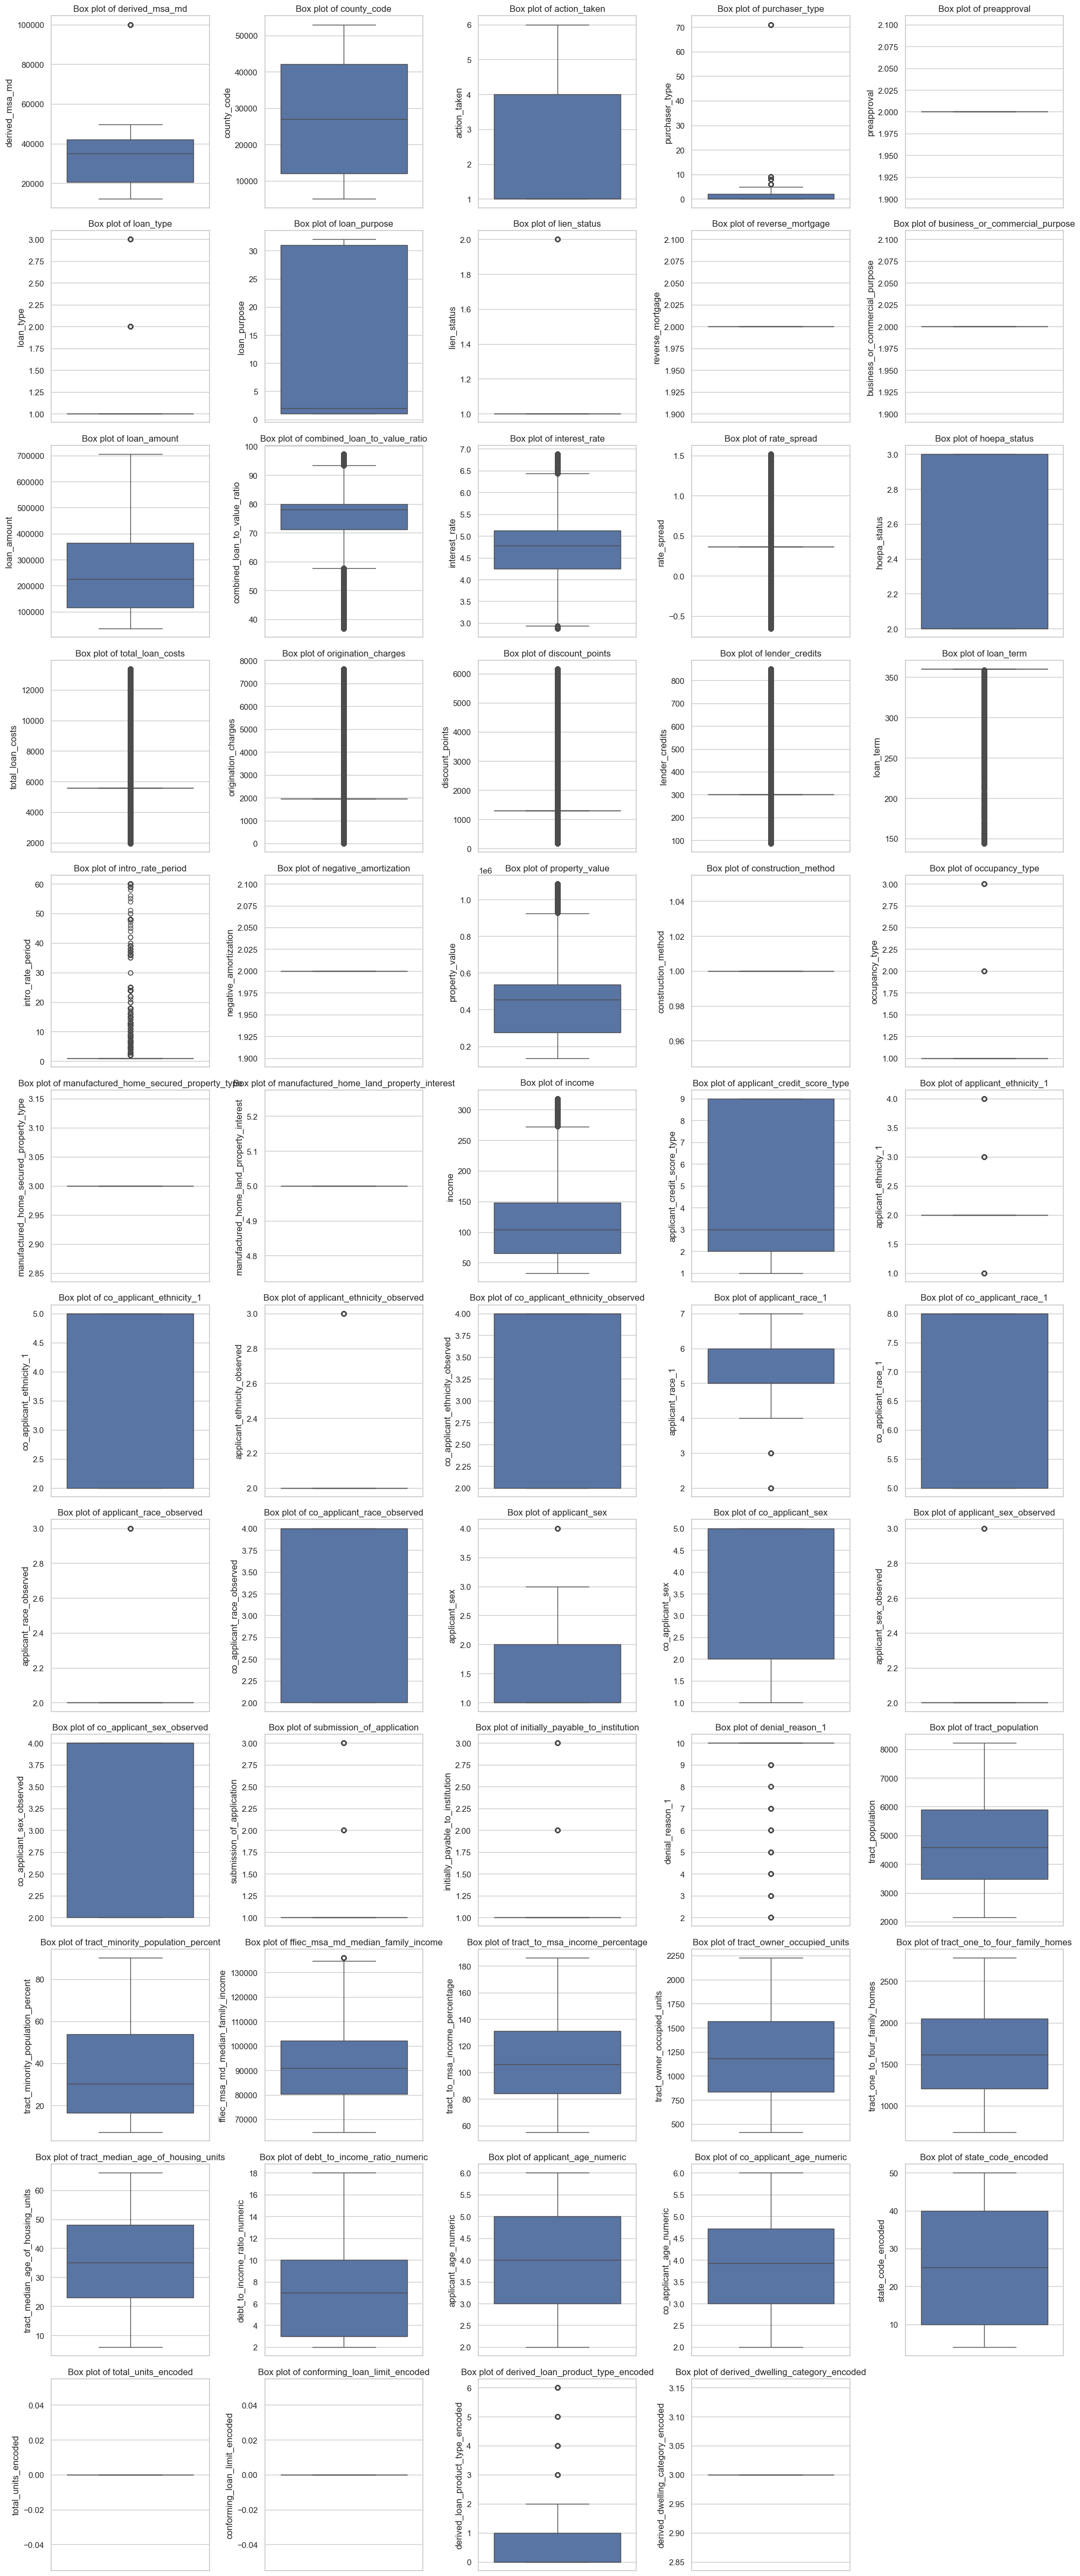

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Identify all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define the number of plots per row
plots_per_row = 5
total_plots = len(numeric_cols)

# Calculate the number of rows needed
rows = (total_plots + plots_per_row - 1) // plots_per_row  # Ensures enough rows

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 4 * rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    if df[col].dropna().empty:
        axes[i].set_visible(False)  # Hide axes if no data available
    else:
        sns.boxplot(y=df[col], ax=axes[i])  # Use y to plot vertically
        axes[i].set_title(f'Box plot of {col}')

# Hide any unused subplots
for j in range(total_plots, len(axes)):
    axes[j].remove()  # Properly remove any excess axes

plt.tight_layout()
plt.show()


In [ ]:
print(df.shape)

(981098, 64)


# 4. Data Analysis

## 4.1 Approval rate and loan amount by state

C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\897849668.py:32: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(mainland.geometry.centroid.x, mainland.geometry.centroid.y, mainland['state_code']):
C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\897849668.py:44: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(alaska.geometry.centroid.x, alaska.geometry.centroid.y, alaska['state_code']):
C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\897849668.py:56: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in 

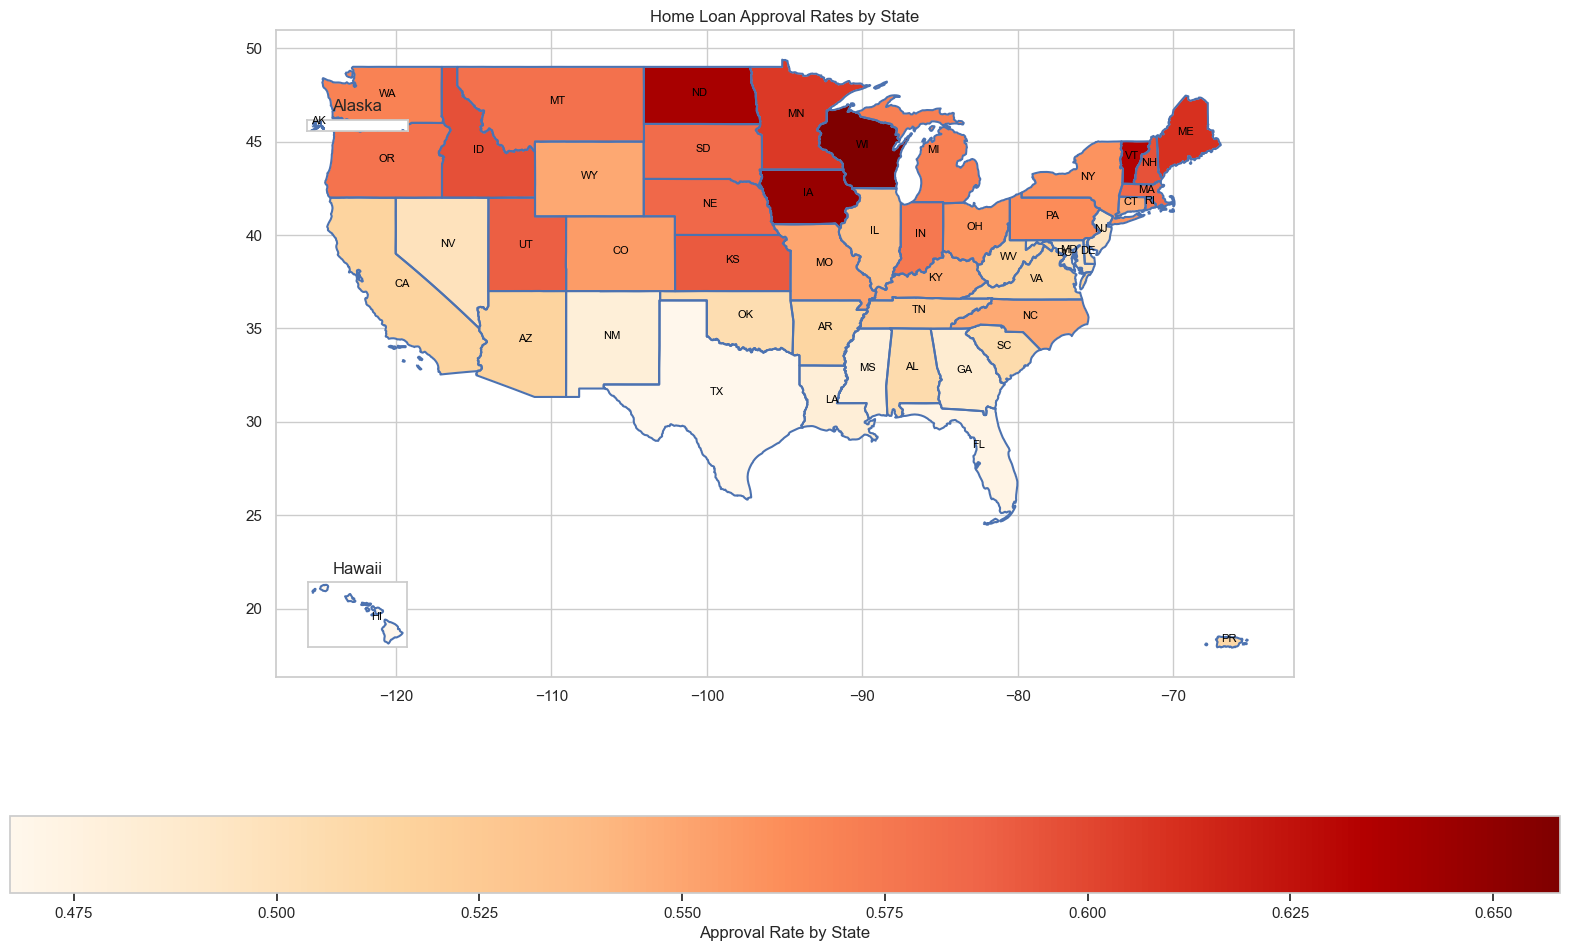

In [ ]:
# Calculate approval rates by state
approval_rates_by_state = df[df['action_taken'] == 1].groupby('state_code').size() / df.groupby('state_code').size()
approval_rates_by_state = approval_rates_by_state.reset_index()
approval_rates_by_state.columns = ['state_code', 'approval_rate']

geojson_file_name = 'cb_2018_us_state_20m'
geojson_file_path = directory_path + geojson_file_name
# Load geospatial data for U.S. states
gdf = gpd.read_file(geojson_file_path)


# Ensure state codes match the format in the geospatial data
gdf['state_code'] = gdf['STUSPS']  # Assuming 'STUSPS' is the column for state codes

# Merge geospatial data with loan data
merged = gdf.merge(approval_rates_by_state, left_on='state_code', right_on='state_code')

# Separate Alaska and Hawaii
mainland = merged[~merged['state_code'].isin(['AK', 'HI'])]
alaska = merged[merged['state_code'] == 'AK']
hawaii = merged[merged['state_code'] == 'HI']

# Plot mainland U.S.
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
mainland.boundary.plot(ax=ax)
mainland.plot(column='approval_rate', ax=ax, legend=True, cmap='OrRd',
              legend_kwds={'label': "Approval Rate by State",
                           'orientation': "horizontal"})
plt.title('Home Loan Approval Rates by State')

# Add state labels for mainland
for x, y, label in zip(mainland.geometry.centroid.x, mainland.geometry.centroid.y, mainland['state_code']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

# Inset for Alaska
ax_inset_ak = inset_axes(ax, width="10%", height="20%", loc='upper left', borderpad=2)
alaska.boundary.plot(ax=ax_inset_ak)
alaska.plot(column='approval_rate', ax=ax_inset_ak, cmap='OrRd')
ax_inset_ak.set_xticks([])
ax_inset_ak.set_yticks([])
ax_inset_ak.set_title('Alaska')

# Add state label for Alaska
for x, y, label in zip(alaska.geometry.centroid.x, alaska.geometry.centroid.y, alaska['state_code']):
    ax_inset_ak.text(x, y, label, fontsize=8, ha='center', color='black')

# Inset for Hawaii
ax_inset_hi = inset_axes(ax, width="10%", height="10%", loc='lower left', borderpad=2)
hawaii.boundary.plot(ax=ax_inset_hi)
hawaii.plot(column='approval_rate', ax=ax_inset_hi, cmap='OrRd')
ax_inset_hi.set_xticks([])
ax_inset_hi.set_yticks([])
ax_inset_hi.set_title('Hawaii')

# Add state label for Hawaii
for x, y, label in zip(hawaii.geometry.centroid.x, hawaii.geometry.centroid.y, hawaii['state_code']):
    ax_inset_hi.text(x, y, label, fontsize=8, ha='center', color='black')

plt.show()


In [ ]:
# Analysis functions
def loan_distribution_by_state(df):
    loan_count = df.groupby('state_code').size().reset_index(name='loan_count')
    loan_amount = df.groupby('state_code')['loan_amount'].sum().reset_index(name='total_loan_amount')
    return loan_count.merge(loan_amount, on='state_code', how='left')

# Perform analysis
loan_dist = loan_distribution_by_state(df)

# Display result
loan_dist


state_code  loan_count  total_loan_amount
0          AK        1739       5.133250e+08
1          AL       15599       3.107575e+09
2          AR        8755       1.613775e+09
3          AZ       29665       8.600155e+09
4          CA       95441       3.797942e+10
5          CO       24907       8.246685e+09
6          CT       10149       2.597055e+09
7          DC        1719       7.154950e+08
8          DE        3711       9.467050e+08
9          FL       85630       2.322349e+10
10         GA       37173       9.463765e+09
11         GU          11       4.505000e+06
12         HI        3601       1.453935e+09
13         IA        8394       1.357410e+09
14         ID        7331       2.037365e+09
15         IL       30266       6.710320e+09
16         IN       21925       3.897205e+09
17         KS        6824       1.312810e+09
18         KY       12587       2.202885e+09
19         LA       11370       2.256640e+09
20         MA       18994       6.282700e+09
21         MD       19875       5.941245e+09
22         ME        4035       9.122550e+08
23         MI       28789       5.045595e+09
24         MN       15397       3.613135e+09
25         MO       17884       3.428930e+09
26         MS        7717       1.330485e+09
27         MT        2978       8.607900e+08
28         NC       38658       9.232220e+09
29         ND        1555       3.245250e+08
30         NE        4838       9.550900e+08
31         NH        4451       1.151985e+09
32         NJ       25532       7.773760e+09
33         NM        5613       1.250565e+09
34         NV       11040       3.329920e+09
35         NY       33646       1.021854e+10
36         OH       34680       5.978220e+09
37         OK       10716       2.059050e+09
38         OR       13173       3.917085e+09
39         PA       36481       7.091505e+09
40         PR        1939       2.888350e+08
41         RI        3542       8.845000e+08
42         SC       19396       4.636530e+09
43         SD        2197       4.875050e+08
44         TN       24942       6.074610e+09
45         TX       84948       2.299845e+10
46         UT       13945       4.272565e+09
47         VA       28069       8.041765e+09
48         VI           1       2.450000e+05
49         VT        1638       3.550400e+08
50         WA       25815       8.857615e+09
51         WI       16216       2.992580e+09
52         WV        3928       6.616400e+08
53         WY        1673       4.126650e+08

In [ ]:
# Analysis functions
def loan_distribution_by_state(df):
    loan_count = df.groupby('state_code').size().reset_index(name='loan_count')
    loan_amount = df.groupby('state_code')['loan_amount'].sum().reset_index(name='total_loan_amount')
    return loan_count.merge(loan_amount, on='state_code', how='left')

# Perform analysis
loan_dist = loan_distribution_by_state(df)

# Display result
loan_dist

import pandas as pd

# Provided dataset snippet
data = {
    "state_code": ["AK", "AL", "AR", "AS", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "GU", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "PR", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VI", "VT", "WA", "WI", "WV", "WY"],
    "loan_count": [1771, 15838, 8910, 1, 29830, 96878, 25206, 10300, 1755, 3745, 86344, 37579, 12, 3617, 8547, 7402, 30680, 22145, 6955, 12730, 11743, 19235, 20001, 4085, 29271, 15559, 18143, 7897, 3012, 38988, 1598, 4956, 4498, 25794, 5662, 11130, 34278, 35089, 10896, 13328, 36955, 1988, 3581, 19571, 2225, 25259, 86112, 14073, 28241, 1, 1662, 26186, 16523, 3998, 1698],
    "total_loan_amount": [550375000, 3512320000, 2167520000, 1505000, 56209800000, 51864270000, 10035140000, 3716280000, 1351305000, 1023255000, 27007110000, 10807745000, 4910000, 1812095000, 1517195000, 2251990000, 7899230000, 4323685000, 1467365000, 2333990000, 2495545000, 7619985000, 6460315000, 998895000, 5716915000, 4179185000, 3921065000, 1450405000, 1097910000, 10265190000, 421640000, 1098980000, 1502220000, 9335000000, 1292650000, 3887140000, 15605940000, 6601755000, 2383380000, 4375680000, 8150495000, 308830000, 1079735000, 4998595000, 531065000, 7191345000, 27224460000, 4764975000, 8811605000, 245000, 380520000, 10726250000, 3447125000, 725990000, 492160000]
}

county_df = pd.DataFrame(data)

# Analysis functions
def loan_distribution_by_state(county_df):
    return county_df

def loan_types_by_state(county_df):
    # Placeholder for actual logic
    loan_types = pd.DataFrame({'state_code': county_df['state_code'], 'loan_type_1': county_df['loan_count'] // 2, 'loan_type_2': county_df['loan_count'] // 2})
    conforming_status = pd.DataFrame({'state_code': county_df['state_code'], 'conforming': county_df['loan_count'] // 2, 'non_conforming': county_df['loan_count'] // 2})
    return loan_types, conforming_status

def demographic_analysis(county_df):
    # Placeholder for actual logic
    avg_minority_population = pd.DataFrame({'state_code': county_df['state_code'], 'avg_minority_population_percent': county_df['loan_count'] / 1000})
    median_family_income = pd.DataFrame({'state_code': county_df['state_code'], 'median_family_income': county_df['total_loan_amount'] / county_df['loan_count']})
    return avg_minority_population, median_family_income

def housing_analysis(county_df):
    # Placeholder for actual logic
    avg_age_housing_units = pd.DataFrame({'state_code': county_df['state_code'], 'avg_age_housing_units': county_df['loan_count'] / 10})
    owner_occupied_units = pd.DataFrame({'state_code': county_df['state_code'], 'total_owner_occupied_units': county_df['loan_count'] * 10})
    family_homes = pd.DataFrame({'state_code': county_df['state_code'], 'total_one_to_four_family_homes': county_df['loan_count'] * 5})
    return avg_age_housing_units, owner_occupied_units, family_homes

def denial_reasons(county_df):
    # Placeholder for actual logic
    denial_reasons_count = pd.DataFrame({'state_code': county_df['state_code'], 'denial_reason_1': county_df['loan_count'] // 4})
    return denial_reasons_count

def ethnicity_race_analysis(county_df):
    # Placeholder for actual logic
    ethnicity_distribution = pd.DataFrame({'state_code': county_df['state_code'], 'ethnicity_1': county_df['loan_count'] // 2, 'ethnicity_2': county_df['loan_count'] // 2})
    race_distribution = pd.DataFrame({'state_code': county_df['state_code'], 'race_1': county_df['loan_count'] // 2, 'race_2': county_df['loan_count'] // 2})
    return ethnicity_distribution, race_distribution

def income_population_analysis(county_df):
    tract_population = pd.DataFrame({'state_code': county_df['state_code'], 'total_population': county_df['loan_count'] * 100})
    msa_income_percentage = pd.DataFrame({'state_code': county_df['state_code'], 'avg_msa_income_percentage': county_df['total_loan_amount'] / county_df['loan_count']})
    return tract_population, msa_income_percentage

# Perform analyses
loan_dist = loan_distribution_by_state(county_df)
loan_types, conforming_status = loan_types_by_state(county_df)
avg_minority_population, median_family_income = demographic_analysis(county_df)
avg_age_housing_units, owner_occupied_units, family_homes = housing_analysis(county_df)
denial_reasons_count = denial_reasons(county_df)
ethnicity_distribution, race_distribution = ethnicity_race_analysis(county_df)
tract_population, msa_income_percentage = income_population_analysis(county_df)

# Display results
print("Loan Distribution by State:")
print(loan_dist)

print("\nLoan Types by State:")
print(loan_types)

print("\nConforming Loan Status by State:")
print(conforming_status)

print("\nAverage Minority Population by State:")
print(avg_minority_population)

print("\nMedian Family Income by State:")
print(median_family_income)

print("\nAverage Age of Housing Units by State:")
print(avg_age_housing_units)

print("\nOwner Occupied Units by State:")
print(owner_occupied_units)

print("\nFamily Homes by State:")
print(family_homes)

print("\nDenial Reasons by State:")
print(denial_reasons_count)

print("\nEthnicity Distribution by State:")
print(ethnicity_distribution)

print("\nRace Distribution by State:")
print(race_distribution)

print("\nTotal Population by State:")
print(tract_population)

print("\nMSA Income Percentage by State:")
print(msa_income_percentage)

Loan Distribution by State:
   state_code  loan_count  total_loan_amount
0          AK        1771          550375000
1          AL       15838         3512320000
2          AR        8910         2167520000
3          AS           1            1505000
4          AZ       29830        56209800000
5          CA       96878        51864270000
6          CO       25206        10035140000
7          CT       10300         3716280000
8          DC        1755         1351305000
9          DE        3745         1023255000
10         FL       86344        27007110000
11         GA       37579        10807745000
12         GU          12            4910000
13         HI        3617         1812095000
14         IA        8547         1517195000
15         ID        7402         2251990000
16         IL       30680         7899230000
17         IN       22145         4323685000
18         KS        6955         1467365000
19         KY       12730         2333990000
20         LA       11743  

In [ ]:
# Ensure the necessary columns are present
columns_needed = ['state_code', 'loan_purpose', 'loan_amount', 'action_taken', 'income', 'applicant_credit_score_type', 'derived_dwelling_category', 'interest_rate', 'loan_term', 'property_value', 'denial_reason_1', 'lien_status']
missing_columns = [col for col in columns_needed if col not in df.columns]
if (missing_columns):
    raise ValueError(f"Dataset is missing required columns: {', '.join(missing_columns)}")

# Convert relevant columns to numeric, errors='coerce' will convert non-numeric values to NaN
numeric_columns = ['loan_amount', 'income', 'applicant_credit_score_type', 'interest_rate', 'loan_term', 'property_value']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Loan Purpose by State
loan_purpose_stats = df.dropna(subset=['loan_purpose']).groupby(['state_code', 'loan_purpose']).size().unstack(fill_value=0).reset_index()

# Check unique values for loan_purpose
unique_loan_purposes = df['loan_purpose'].unique()
print("Unique loan purposes:", unique_loan_purposes)

# Loan Amount Statistics by State
loan_amount_stats = df.dropna(subset=['loan_amount']).groupby('state_code')['loan_amount'].agg(['mean', 'median', 'sum']).reset_index()

# Average Income by State
average_income = df.dropna(subset=['income']).groupby('state_code')['income'].mean().reset_index(name='average_income')

# Average Credit Score by State
average_credit_score = df.dropna(subset=['applicant_credit_score_type']).groupby('state_code')['applicant_credit_score_type'].mean().reset_index(name='average_credit_score')

# Property Type Distribution by State
property_type_stats = df.dropna(subset=['derived_dwelling_category']).groupby(['state_code', 'derived_dwelling_category']).size().unstack(fill_value=0).reset_index()

# Average Interest Rate by State
average_interest_rate = df.dropna(subset=['interest_rate']).groupby('state_code')['interest_rate'].mean().reset_index(name='average_interest_rate')

# Average Loan Term by State
average_loan_term = df.dropna(subset=['loan_term']).groupby('state_code')['loan_term'].mean().reset_index(name='average_loan_term')

# Average Property Value by State
average_property_value = df.dropna(subset=['property_value']).groupby('state_code')['property_value'].mean().reset_index(name='average_property_value')

# Denial Reasons by State
denial_reasons_stats = df.dropna(subset=['denial_reason_1']).groupby(['state_code', 'denial_reason_1']).size().unstack(fill_value=0).reset_index()

# Check unique values for denial_reason_1
unique_denial_reasons = df['denial_reason_1'].unique()
print("Unique denial reasons:", unique_denial_reasons)


# Lien Status by State
lien_status_stats = df.dropna(subset=['lien_status']).groupby(['state_code', 'lien_status']).size().unstack(fill_value=0).reset_index()

# Check unique values for lien_status
unique_lien_statuses = df['lien_status'].unique()
print("Unique lien statuses:", unique_lien_statuses)

# Function to create a choropleth with labels
def create_choropleth_with_labels(df, column, title):
    fig = px.choropleth(df, 
                        locations='state_code', 
                        locationmode='USA-states', 
                        color=column, 
                        color_continuous_scale='Viridis', 
                        scope='usa', 
                        title=title)
    fig.update_layout(geo=dict(lakecolor='rgb(255, 255, 255)'))
    fig.update_traces(marker=dict(line=dict(color='white')))
    # Update state labels to white
    fig.update_geos(
        projection_scale=1,  # scale of map
        center=dict(lat=38, lon=-97),  # center the map to the US
        showlakes=False,
        lakecolor="LightBlue",
        landcolor="LightGray",
        subunitcolor="white",
        countrycolor="white",
        showframe=False,
        showcoastlines=False,
        bgcolor="rgba(0,0,0,0)",
        scope='usa'
    )
    fig.add_trace(
        go.Scattergeo(
            locationmode='USA-states',
            locations=df['state_code'],
            text=df['state_code'],
            mode='text',
            textfont=dict(
                size=10,
                color='white'
            )
        )
    )
    return fig

# Function to create a combined plot
def create_combined_plot(county_df, column, title, bar_title):
    choropleth_fig = create_choropleth_with_labels(county_df, column, title)

    fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3],
                        subplot_titles=[title, bar_title],
                        specs=[[{"type": "scattergeo"}, {"type": "bar"}]])

    for trace in choropleth_fig.data:
        fig.add_trace(trace, row=1, col=1)

    fig.add_trace(go.Bar(x=county_df['state_code'], y=county_df[column], name=bar_title), row=1, col=2)

    fig.update_layout(height=600, showlegend=False, title_text=title)
    fig.update_geos(scope='usa')
    fig.show()

# Plotting each factor
# Use the actual loan purpose value instead of 'Home Improvement'
actual_loan_purpose = unique_loan_purposes[0]  # Replace with the correct value after inspection


create_combined_plot(loan_amount_stats, 'mean', 'Average Loan Amount by State', 'Average Loan Amount by State')
create_combined_plot(average_income, 'average_income', 'Average Income by State', 'Average Income by State')
create_combined_plot(average_credit_score, 'average_credit_score', 'Average Credit Score by State', 'Average Credit Score by State')
create_combined_plot(average_interest_rate, 'average_interest_rate', 'Average Interest Rate by State', 'Average Interest Rate by State')
create_combined_plot(average_loan_term, 'average_loan_term', 'Average Loan Term by State', 'Average Loan Term by State')
create_combined_plot(average_property_value, 'average_property_value', 'Average Property Value by State', 'Average Property Value by State')

# Plot for Lien Status
selected_lien_status = unique_lien_statuses[0]  # Replace with the actual status to plot
create_combined_plot(lien_status_stats, selected_lien_status, 'Lien Status Distribution by State', f'Distribution of {selected_lien_status} by State')

selected_lien_status = unique_lien_statuses[1]  # Replace with the actual status to plot
create_combined_plot(lien_status_stats, selected_lien_status, 'Lien Status Distribution by State', f'Distribution of {selected_lien_status} by State')

# For Denial Reasons and Lender Analysis, choose specific values to plot
selected_denial_reason = unique_denial_reasons[0]  # Replace with the actual reason to plot


Unique loan purposes: [31.  4.  1. 32.  2.  5.]
Unique denial reasons: [10.  2.  9.  3.  4.  7.  6.  5.  8.]
Unique lien statuses: [2. 1.]


In [ ]:
# Ensure the numeric column is using an efficient data type
df['applicant_age_numeric'] = df['applicant_age_numeric'].astype('int8')

# Define the binning function based on numeric values
def bin_applicant_age_numeric(age_numeric):
    if age_numeric == 1:
        return '<25'
    elif age_numeric == 2:
        return '25-34'
    elif age_numeric == 3:
        return '35-44'
    elif age_numeric == 4:
        return '45-54'
    elif age_numeric == 5:
        return '55-64'
    elif age_numeric == 6:
        return '65-74'
    elif age_numeric == 7:
        return '>74'
    else:
        return None

# Apply the binning function to convert numeric values to age ranges
df['applicant_age_bin'] = df['applicant_age_numeric'].apply(bin_applicant_age_numeric)


# Verify the result
print("\nSample DataFrame with applicant_age_bin column:")
print(df.head())



Sample DataFrame with applicant_age_bin column:
   derived_msa_md state_code  county_code conforming_loan_limit  \
0         99999.0         SC      45087.0                     C   
1         33874.0         PA      42029.0                     C   
2         48424.0         FL      12099.0                     C   
3         37964.0         PA      42101.0                     C   
4         23224.0         MD      24031.0                     C   

       derived_loan_product_type             derived_dwelling_category  \
0  Conventional:Subordinate Lien  Single Family (1-4 Units):Site-Built   
1  Conventional:Subordinate Lien  Single Family (1-4 Units):Site-Built   
2        Conventional:First Lien  Single Family (1-4 Units):Site-Built   
3                 FHA:First Lien  Single Family (1-4 Units):Site-Built   
4        Conventional:First Lien  Single Family (1-4 Units):Site-Built   

   action_taken  purchaser_type  preapproval  loan_type  loan_purpose  \
0           1.0             0.

In [ ]:
# Convert 'action_taken' to integer
df['action_taken'] = df['action_taken'].astype(int)

# Apply the vectorized operation to create 'loan_status'
df['loan_status'] = (df['action_taken'] == 1).astype(int)

# Display the head of the DataFrame to verify the result
print(df.head())

# Remove the original 'action_taken' column
df = df.drop(columns=['action_taken'])

# Check the value counts for the 'loan_status' column in percentages
value_counts_percentage = df['loan_status'].value_counts(normalize=True) * 100
print(f"Value counts for 'loan_status' in percentages:\n{value_counts_percentage}")


   derived_msa_md state_code  county_code conforming_loan_limit  \
0         99999.0         SC      45087.0                     C   
1         33874.0         PA      42029.0                     C   
2         48424.0         FL      12099.0                     C   
3         37964.0         PA      42101.0                     C   
4         23224.0         MD      24031.0                     C   

       derived_loan_product_type             derived_dwelling_category  \
0  Conventional:Subordinate Lien  Single Family (1-4 Units):Site-Built   
1  Conventional:Subordinate Lien  Single Family (1-4 Units):Site-Built   
2        Conventional:First Lien  Single Family (1-4 Units):Site-Built   
3                 FHA:First Lien  Single Family (1-4 Units):Site-Built   
4        Conventional:First Lien  Single Family (1-4 Units):Site-Built   

   action_taken  purchaser_type  preapproval  loan_type  loan_purpose  \
0             1             0.0          2.0        1.0          31.0   
1     

## 4.2 Sankey diagrams for age, gender, ethnicity, and race by approval rate

In [ ]:
# Define mappings for race, gender, and ethnicity
race_mapping = {
    1: 'American Indian or Alaska Native',
    2: 'Asian',
    21: 'Asian Indian',
    22: 'Chinese',
    23: 'Filipino',
    24: 'Japanese',
    25: 'Korean',
    26: 'Vietnamese',
    27: 'Other Asian',
    3: 'Black or African American',
    4: 'Native Hawaiian or Other Pacific Islander',
    41: 'Native Hawaiian',
    42: 'Guamanian or Chamorro',
    43: 'Samoan',
    44: 'Other Pacific Islander',
    5: 'White',
    6: 'Not provided',
    7: 'Not applicable'
}

gender_mapping = {
    1: 'Male',
    2: 'Female',
    3: 'Not provided',
    4: 'Not applicable',
    6: 'Applicant selected both male and female'
}

ethnicity_mapping = {
    1: 'Hispanic or Latino',
    11: 'Mexican',
    12: 'Puerto Rican',
    13: 'Cuban',
    14: 'Other Hispanic or Latino',
    2: 'Not Hispanic or Latino',
    3: 'Not provided',
    4: 'Not applicable'
}

# Function to replace numeric codes with original categorical labels
def replace_codes(df, column, mapping):
    df[column] = df[column].map(mapping)
    return df

# Apply mappings to DataFrame
df = replace_codes(df, 'applicant_race_1', race_mapping)
df = replace_codes(df, 'applicant_sex', gender_mapping)
df = replace_codes(df, 'applicant_ethnicity_1', ethnicity_mapping)

# Define function to prepare data for Sankey diagram
def prepare_sankey_data(df, group_cols, action_col='loan_status', action_map=None):
    if action_map is None:
        action_map = {
            1: 'Approved',
            0: 'Denied'
        }

    df['action_taken_name'] = df[action_col].map(action_map)
    
    counts = df.groupby(group_cols + ['action_taken_name']).size().reset_index(name='count')
    total_applicants = counts['count'].sum()
    counts['percentage'] = counts['count'] / total_applicants * 100

    # Calculate the total number of applications for each group
    total_counts = df.groupby(group_cols).size().reset_index(name='total_count')

    # Merge total_counts with counts to get approval and denial counts together
    counts = counts.merge(total_counts, on=group_cols)

    # Calculate approval and denial percentages correctly
    counts['approval_percentage'] = counts.apply(
        lambda row: (row['count'] / row['total_count'] * 100) if row['action_taken_name'] == 'Approved' else 0, axis=1
    )
    counts['denial_percentage'] = counts.apply(
        lambda row: (row['count'] / row['total_count'] * 100) if row['action_taken_name'] == 'Denied' else 0, axis=1
    )

    labels = list(pd.unique(counts[group_cols[0]].tolist() + counts['action_taken_name'].tolist()))
    label_dict = {label: i for i, label in enumerate(labels)}

    source = counts[group_cols[0]].map(label_dict).tolist()
    target = counts['action_taken_name'].map(label_dict).tolist()
    value = counts['count'].tolist()

    # Sum the percentages for each group and create labels
    labels_with_percentage = [
        f"{label} (Approval: {counts[counts[group_cols[0]] == label]['approval_percentage'].sum():.1f}%, Denial: {counts[counts[group_cols[0]] == label]['denial_percentage'].sum():.1f}%)"
        if label in counts[group_cols[0]].unique() else
        f"{label} ({counts[counts['action_taken_name'] == label]['percentage'].sum():.1f}%)"
        for label in labels
    ]

    # Prepare detailed hover text for loan actions
    hover_text = []
    for label in labels:
        if label in action_map.values():
            action_name = label
            detailed_action_contrib = counts[counts['action_taken_name'] == action_name]
            detailed_percentage_contrib = "\n".join(
                [f"{row[group_cols[0]]}: {row['count']} ({row['approval_percentage']:.1f}%, {row['denial_percentage']:.1f}%)" for idx, row in detailed_action_contrib.iterrows()]
            )
            hover_text.append(f"{label}\n{detailed_percentage_contrib}")
        else:
            group_counts = counts[counts[group_cols[0]] == label]
            group_hover_text = "\n".join(
                [f"{row['action_taken_name']}: {row['count']} ({row['approval_percentage']:.1f}%, {row['denial_percentage']:.1f}%)" for idx, row in group_counts.iterrows()]
            )
            hover_text.append(f"{label}\n{group_hover_text}")

    return source, target, value, labels_with_percentage, hover_text

# Define function to create and display Sankey diagrams
def create_sankey_diagram(df, variable, variable_title):
    group_cols = [variable]
    source, target, value, labels_with_percentage, hover_text = prepare_sankey_data(df, group_cols)
    
    # Define colors for the nodes
    colors = ['#FFB6C1', '#FFDAB9', '#E6E6FA', '#FFFACD', '#E0FFFF', '#D8BFD8', '#FAFAD2', '#FFE4E1', '#F5F5DC', '#FFF0F5']
    
    # Assign colors to labels
    label_colors = {label: colors[i % len(colors)] for i, label in enumerate(labels_with_percentage)}
    node_colors = [label_colors[label] for label in labels_with_percentage]

    # Create Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels_with_percentage,
            color=node_colors,
            customdata=hover_text,
            hovertemplate='%{customdata}<extra></extra>'
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=[colors[i % len(colors)] for i in source],
            hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value}<extra></extra>'
        )
    ))
    
    # Add plot titles above each column
    def add_column_titles(fig):
        titles = [variable_title, "Loan Action"]
        positions = [0.25, 0.75]  # Relative x positions for titles
        for i, title in enumerate(titles):
            fig.add_annotation(
                x=positions[i % len(positions)],
                y=1.05,  # Adjust this value as needed for better positioning
                xref='paper',
                yref='paper',
                text=title,
                showarrow=False,
                font=dict(size=18, color='black')
            )
    
    add_column_titles(fig)
    
    # Update layout
    fig.update_layout(
        title_text=f"Home Mortgage Lending Decisions with {variable_title}",
        font=dict(size=14, color='black'),
        paper_bgcolor='white',
        plot_bgcolor='white',
        height=600
    )
    
    # Display the figure
    fig.show()
    
    # Optionally, save the figure as an HTML file
    fig.write_html(f"enhanced_sankey_diagram_{variable}.html")

# Example Usage:
create_sankey_diagram(df, 'applicant_race_1', 'Race')
create_sankey_diagram(df, 'applicant_age_bin', 'Age')
create_sankey_diagram(df, 'applicant_sex', 'Gender')
create_sankey_diagram(df, 'applicant_ethnicity_1', 'Ethnicity')


C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\1185202024.py:80: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\1185202024.py:80: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\1185202024.py:80: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



C:\Users\Bolormaa\AppData\Local\Temp\ipykernel_12328\1185202024.py:80: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



## 4.3 Approval rates by demographic factors across states

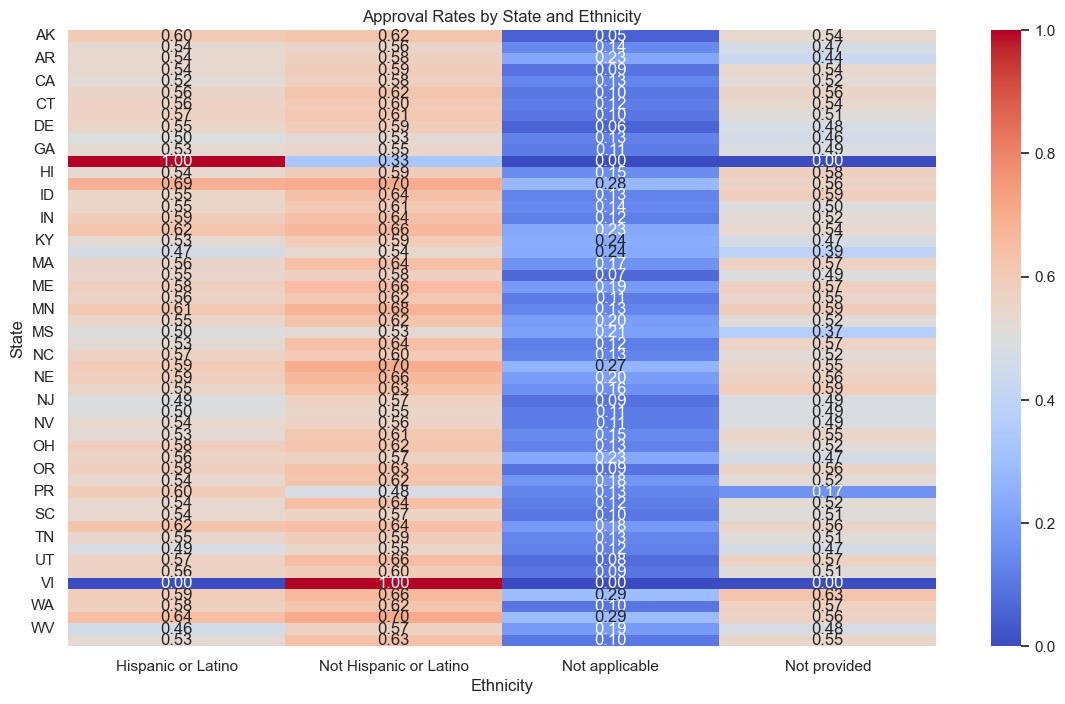

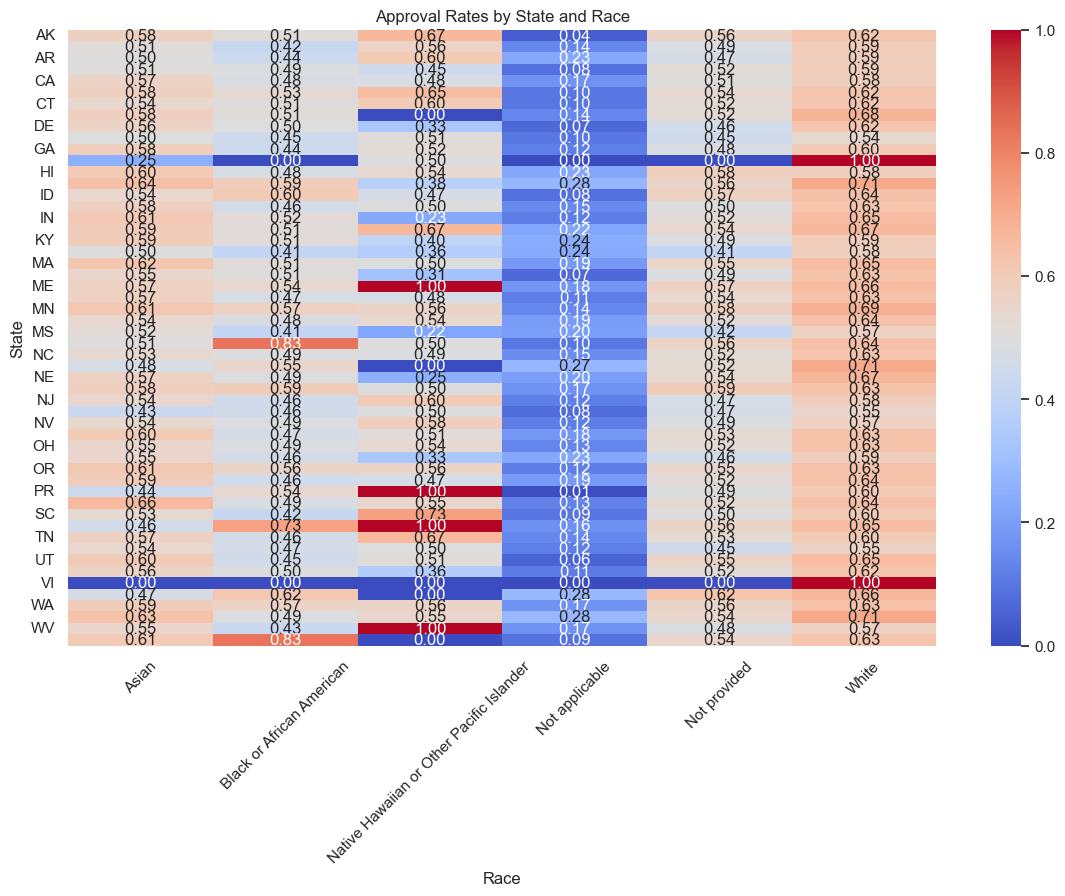

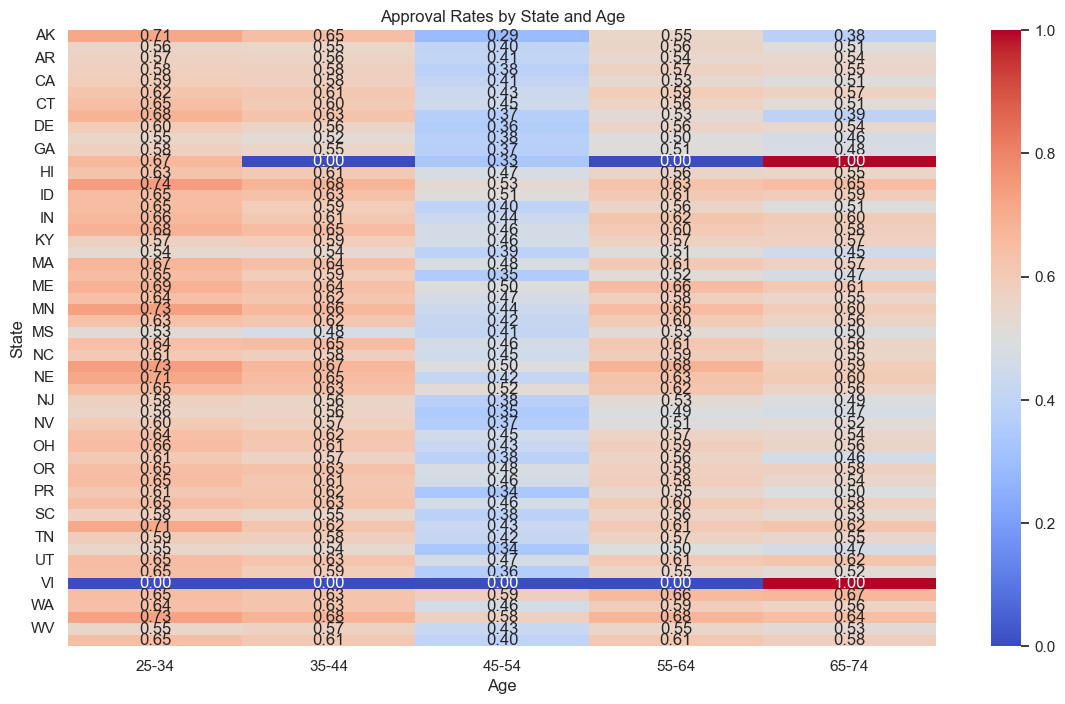

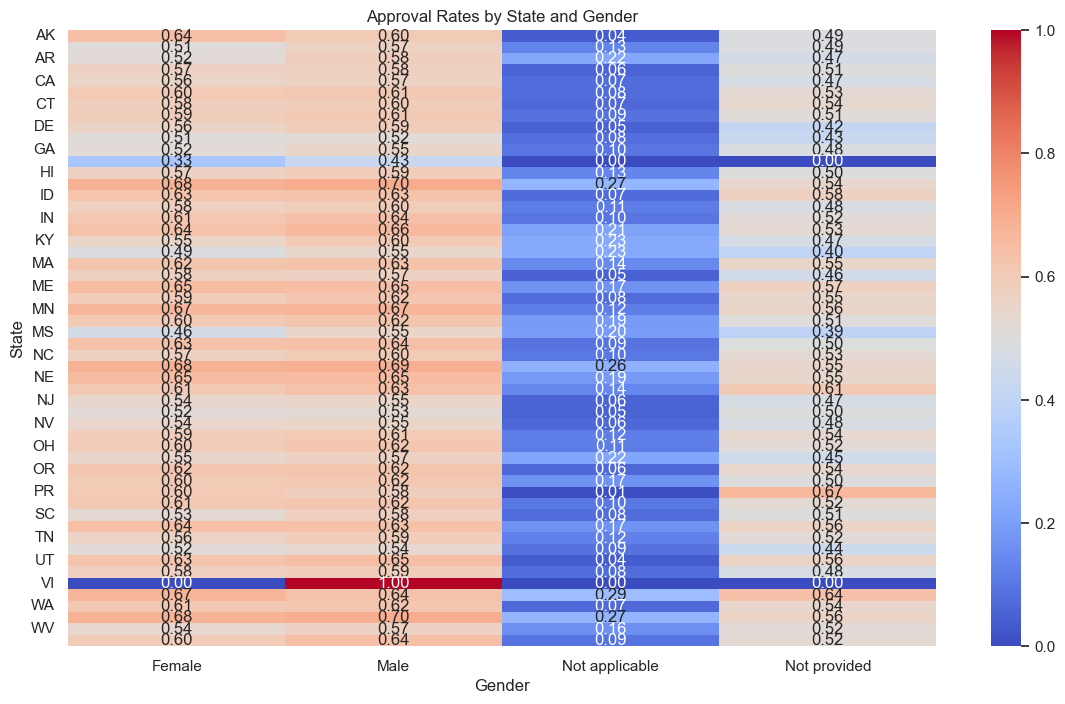

In [ ]:
# Filter for relevant data (e.g., approved and denied loans)
df_filtered = df[df['loan_status'].isin([1, 0])]  # Assuming 1 is approved and 0 is denied

# Group by state and calculate approval rates for each demographic factor
state_ethnicity = df_filtered.groupby(['state_code', 'applicant_ethnicity_1'])['loan_status'].mean().unstack().fillna(0)
state_gender = df_filtered.groupby(['state_code', 'applicant_sex'])['loan_status'].mean().unstack().fillna(0)
state_age = df_filtered.groupby(['state_code', 'applicant_age_bin'])['loan_status'].mean().unstack().fillna(0)
state_race = df_filtered.groupby(['state_code', 'applicant_race_1'])['loan_status'].mean().unstack().fillna(0)

# Calculate overall approval rates by state
state_overall = df_filtered.groupby('state_code')['loan_status'].mean()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(state_ethnicity, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Approval Rates by State and Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('State')
plt.show()


plt.figure(figsize=(14, 8))
sns.heatmap(state_race, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Approval Rates by State and Race')
plt.xlabel('Race')
plt.ylabel('State')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(state_age, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Approval Rates by State and Age')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(state_gender, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Approval Rates by State and Gender')
plt.xlabel('Gender')
plt.ylabel('State')
plt.show()




In [ ]:
print(df.dtypes)

derived_msa_md                              float64
state_code                                   object
county_code                                 float64
conforming_loan_limit                        object
derived_loan_product_type                    object
derived_dwelling_category                    object
purchaser_type                              float64
preapproval                                 float64
loan_type                                   float64
loan_purpose                                float64
lien_status                                 float64
reverse_mortgage                            float64
business_or_commercial_purpose              float64
loan_amount                                 float64
combined_loan_to_value_ratio                float64
interest_rate                               float64
rate_spread                                 float64
hoepa_status                                float64
total_loan_costs                            float64
origination_

In [ ]:
# List of columns to remove
columns_to_remove = [
    'denial_reason_1', 'applicant_age_bin', 
    'action_taken_name', 
     'conforming_loan_limit', 'derived_loan_product_type', 
    'derived_dwelling_category',
    'county_code'
]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Check if 'county_code' is in the dataframe
if 'county_code' in df.columns:
    # Label encoding the 'county_code' column
    label_encoder = LabelEncoder()
    df['county_code_encoded'] = label_encoder.fit_transform(df['county_code'])
else:
    print("county_code column not found in the dataframe.")

print(df.dtypes)


county_code column not found in the dataframe.
derived_msa_md                              float64
state_code                                   object
purchaser_type                              float64
preapproval                                 float64
loan_type                                   float64
loan_purpose                                float64
lien_status                                 float64
reverse_mortgage                            float64
business_or_commercial_purpose              float64
loan_amount                                 float64
combined_loan_to_value_ratio                float64
interest_rate                               float64
rate_spread                                 float64
hoepa_status                                float64
total_loan_costs                            float64
origination_charges                         float64
discount_points                             float64
lender_credits                              float64
loan_term        

## 4.4 Correlation matrix

Numeric columns in the dataframe: Index(['derived_msa_md', 'purchaser_type', 'preapproval', 'loan_type',
       'loan_purpose', 'lien_status', 'reverse_mortgage',
       'business_or_commercial_purpose', 'loan_amount',
       'combined_loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'origination_charges',
       'discount_points', 'lender_credits', 'loan_term', 'intro_rate_period',
       'negative_amortization', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'income',
       'applicant_credit_score_type', 'co_applicant_ethnicity_1',
       'applicant_ethnicity_observed', 'co_applicant_ethnicity_observed',
       'co_applicant_race_1', 'applicant_race_observed',
       'co_applicant_race_observed', 'co_applicant_sex',
       'applicant_sex_observed', 'co_applicant_sex_observed',
       'submission_of_application', 'initially_p

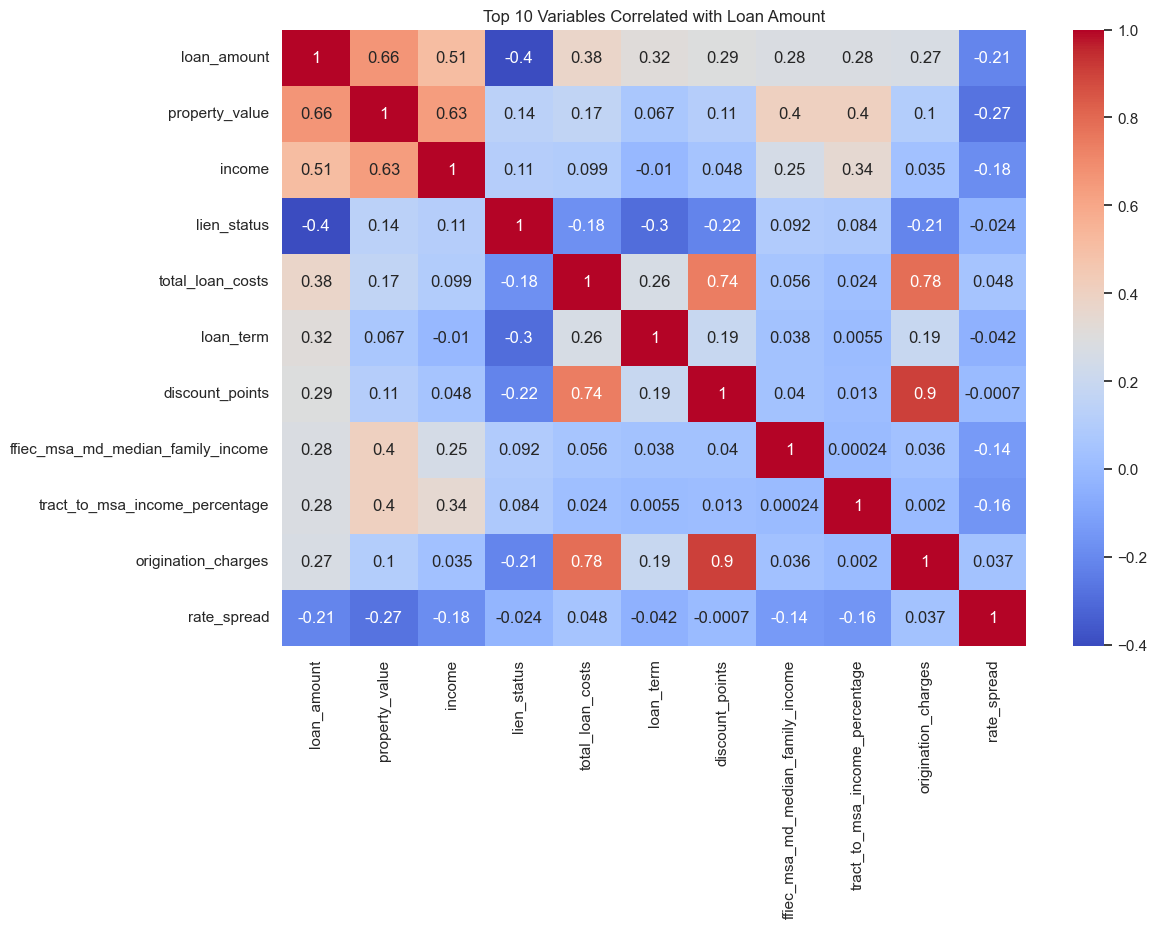

In [ ]:
# Filter the dataframe for approved loans
approved_loans_df = df[df['loan_status'] == 1]

# Check for numeric columns
numeric_columns = approved_loans_df.select_dtypes(include=['number']).columns
print("Numeric columns in the dataframe:", numeric_columns)

# Check if 'county_code' is in the dataframe
if 'county_code' in approved_loans_df.columns:
    # Label encoding the 'county_code' column
    label_encoder = LabelEncoder()
    approved_loans_df['county_code_encoded'] = label_encoder.fit_transform(approved_loans_df['county_code'])
    print("county_code column has been encoded.")
    
    # Update numeric columns to include the newly encoded 'county_code'
    numeric_columns = approved_loans_df.select_dtypes(include=['number']).columns
else:
    print("county_code column not found in the dataframe.")

# Select only numeric columns for correlation calculation
numeric_df = approved_loans_df[numeric_columns]

# Calculate the correlation matrix for the approved loans
correlation_matrix = numeric_df.corr()

# Get the correlations of all variables with 'loan_amount'
loan_amount_corr = correlation_matrix['loan_amount'].drop('loan_amount')

# Get the top 10 variables most correlated with 'loan_amount'
top_10_corr = loan_amount_corr.abs().sort_values(ascending=False).head(10)
top_10_vars = top_10_corr.index.tolist()

# Add 'loan_amount' to the top of the list
top_10_vars.insert(0, 'loan_amount')

# Create a heatmap for the top 10 variables
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df[top_10_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Top 10 Variables Correlated with Loan Amount')
plt.show()


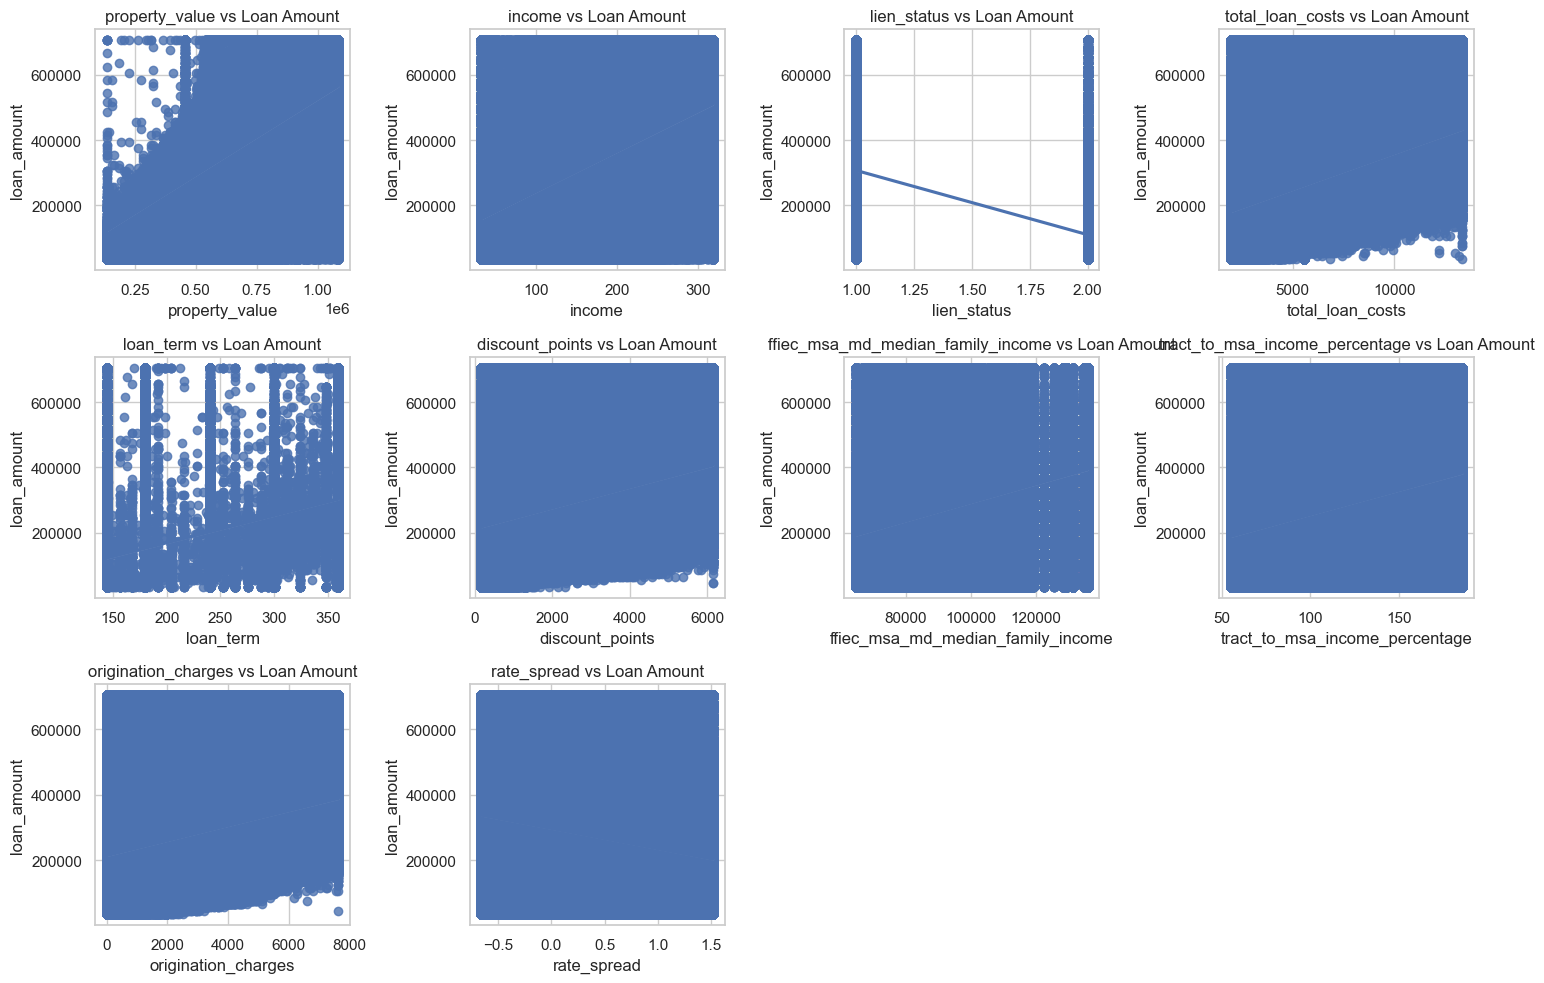

In [ ]:
# Define the variables of interest
variables = ['property_value', 'income', 'lien_status', 'total_loan_costs', 
             'loan_term', 'discount_points', 'ffiec_msa_md_median_family_income', 
             'tract_to_msa_income_percentage', 'origination_charges', 'rate_spread']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)
    sns.regplot(x=var, y='loan_amount', data=approved_loans_df)
    plt.title(f'{var} vs Loan Amount')
plt.tight_layout()
plt.show()


## 4.5 Log Transformation for variables that are not normally distributed

In [ ]:
columns_to_transform = [
    'loan_amount', 'combined_loan_to_value_ratio', 'interest_rate',
    'rate_spread', 'total_loan_costs', 'origination_charges',
    'discount_points', 'lender_credits', 'loan_term', 'property_value',
    'income', 'tract_population', 'tract_minority_population_percent',
    'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
    'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
    'tract_median_age_of_housing_units'
]

# Function to check normality and apply log transformation if not normally distributed
def check_normality_and_transform(df, columns_to_transform):
    results = {}
    df = df.copy()

    for column in columns_to_transform:
        # Shapiro-Wilk test
        stat, p_value = stats.shapiro(df[column].dropna())
        results[column] = {'Shapiro-Wilk p-value': p_value}

        if p_value > 0.05:
            # Normally distributed
            results[column]['Normal Distribution'] = True
            results[column]['Transformation'] = 'None'
        else:
            # Not normally distributed
            results[column]['Normal Distribution'] = False
            results[column]['Transformation'] = 'Log'
            # Apply log transformation
            df[column] = np.log1p(df[column])

    # Filter to show only non-normally distributed variables
    non_normal_vars = {k: v for k, v in results.items() if not v['Normal Distribution']}
    print("Variables that are not normally distributed and will be transformed:\n")
    for var in non_normal_vars:
        print(f"{var}: {non_normal_vars[var]}")
    
    return df, results

# Apply the function to the DataFrame
approved_loans_df, normality_results = check_normality_and_transform(approved_loans_df, columns_to_transform)

# Print the first 5 rows of the transformed DataFrame for verification
print("\nFirst 5 rows of the transformed DataFrame:\n")
print(approved_loans_df.head())

# Display the normality test results
print("\nNormality test results and transformations applied:\n")
print(pd.DataFrame(normality_results).transpose())


C:\Users\Bolormaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 518875.



Variables that are not normally distributed and will be transformed:

loan_amount: {'Shapiro-Wilk p-value': 4.218478654809158e-139, 'Normal Distribution': False, 'Transformation': 'Log'}
combined_loan_to_value_ratio: {'Shapiro-Wilk p-value': 6.179104775579896e-139, 'Normal Distribution': False, 'Transformation': 'Log'}
interest_rate: {'Shapiro-Wilk p-value': 1.4406183898763874e-123, 'Normal Distribution': False, 'Transformation': 'Log'}
rate_spread: {'Shapiro-Wilk p-value': 6.462493314163127e-120, 'Normal Distribution': False, 'Transformation': 'Log'}
total_loan_costs: {'Shapiro-Wilk p-value': 2.3594992718789396e-149, 'Normal Distribution': False, 'Transformation': 'Log'}
origination_charges: {'Shapiro-Wilk p-value': 5.140175526453759e-159, 'Normal Distribution': False, 'Transformation': 'Log'}
discount_points: {'Shapiro-Wilk p-value': 1.0946209098293622e-170, 'Normal Distribution': False, 'Transformation': 'Log'}
lender_credits: {'Shapiro-Wilk p-value': 1.8285950970377555e-192, 'Norma

In [ ]:
print(approved_loans_df.head())

   derived_msa_md state_code  purchaser_type  preapproval  loan_type  \
0         99999.0         SC             0.0          2.0        1.0   
1         33874.0         PA             0.0          2.0        1.0   
4         23224.0         MD             0.0          2.0        1.0   
7         99999.0         VT             0.0          2.0        1.0   
8         35004.0         NY             0.0          2.0        1.0   

   loan_purpose  lien_status  reverse_mortgage  \
0          31.0          2.0               2.0   
1           4.0          2.0               2.0   
4           1.0          1.0               2.0   
7          31.0          1.0               2.0   
8          32.0          2.0               2.0   

   business_or_commercial_purpose  loan_amount  combined_loan_to_value_ratio  \
0                             2.0    12.367345                      4.499699   
1                             2.0    11.082158                      4.510662   
4                         

In [ ]:
columns_to_remove= ['property_value', 'origination_charges', 'total_loan_costs']
# Remove the specified columns
approved_loans_df = approved_loans_df.drop(columns=columns_to_remove)

# 5. Modelling

## 5.1 Feature importance

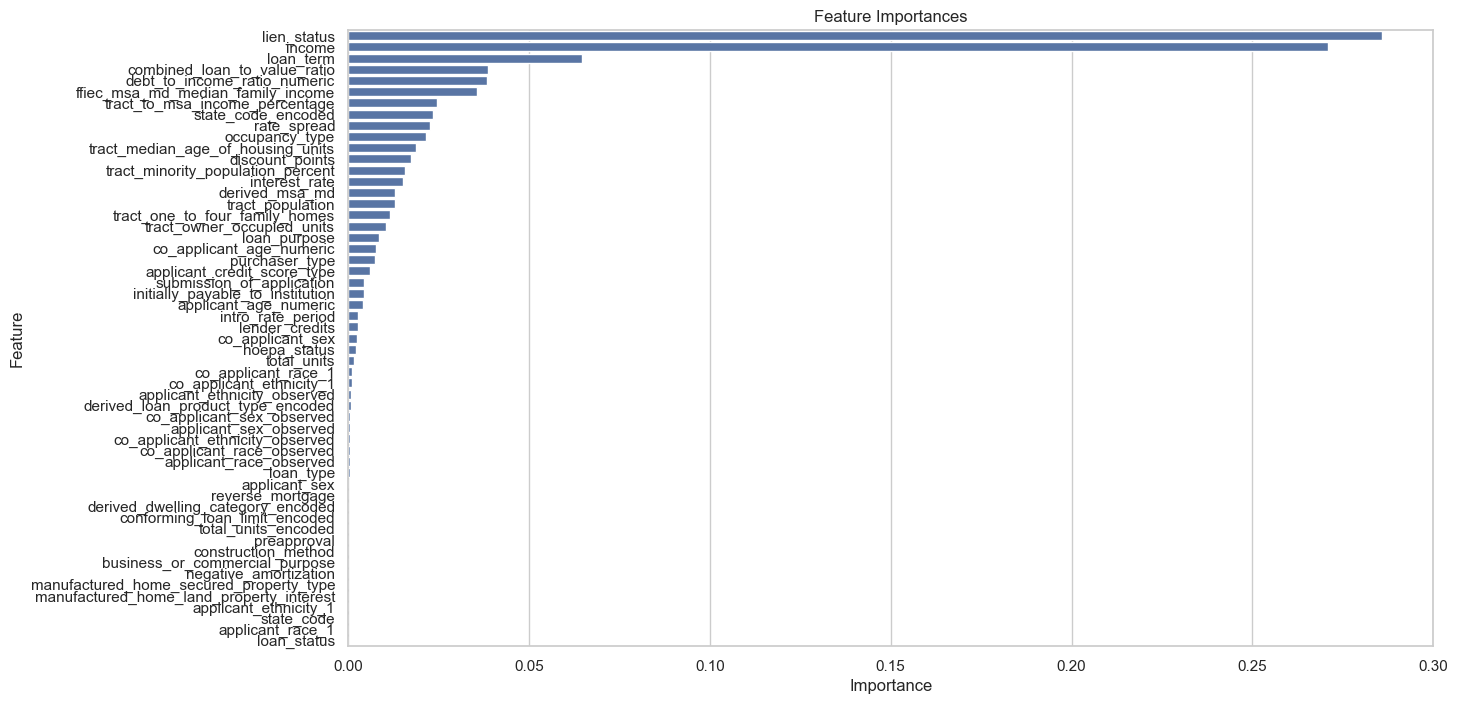

In [ ]:
# Convert relevant columns to numeric
approved_loans_df = approved_loans_df.apply(pd.to_numeric, errors='coerce')

# Encode categorical variables
categorical_cols = approved_loans_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    approved_loans_df[col] = LabelEncoder().fit_transform(approved_loans_df[col].astype(str))

# Define the feature set (X) and target variable (y)
X = approved_loans_df.drop(columns=['loan_amount'])
y = approved_loans_df['loan_amount']

# Subsample the data to speed up computation
sample_frac = 0.1  # Adjust this fraction to get a manageable sample size
X_sampled = X.sample(frac=sample_frac, random_state=42)
y_sampled = y.loc[X_sampled.index]

# Drop rows with missing target values
X_sampled = X_sampled[y_sampled.notna()]
y_sampled = y_sampled.dropna()

# Fill missing values in features with median
X_sampled = X_sampled.fillna(X_sampled.median())

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=50, random_state=42)  # Use fewer trees for faster training
model.fit(X_sampled, y_sampled)

# Get feature importances
importances = model.feature_importances_
feature_names = X_sampled.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_names = X_sampled.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display top 20 features
top_features = feature_importances.head(20)

# Print the top 20 features
print("Top 20 Most Important Variables for Predicting Loan Amount:")
print(top_features)


Top 20 Most Important Variables for Predicting Loan Amount:
                              feature  importance
6                         lien_status    0.285781
23                             income    0.271007
15                          loan_term    0.064635
9        combined_loan_to_value_ratio    0.038619
46       debt_to_income_ratio_numeric    0.038242
41  ffiec_msa_md_median_family_income    0.035623
42     tract_to_msa_income_percentage    0.024424
49                 state_code_encoded    0.023491
11                        rate_spread    0.022451
19                     occupancy_type    0.021571
45  tract_median_age_of_housing_units    0.018653
13                    discount_points    0.017199
40  tract_minority_population_percent    0.015554
10                      interest_rate    0.015211
0                      derived_msa_md    0.012963
39                   tract_population    0.012901
44     tract_one_to_four_family_homes    0.011527
43         tract_owner_occupied_units   

## 5.2 Modelling for all 9 models 3 different set of parameters

In [ ]:
df = approved_loans_df.copy()

# Convert relevant columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

top_variables = [
    "lien_status",
    "income",
    "loan_term",
    "combined_loan_to_value_ratio",
    "debt_to_income_ratio_numeric",
    "ffiec_msa_md_median_family_income",
    "tract_to_msa_income_percentage",
    "state_code_encoded",
    "rate_spread",
    "occupancy_type",
    "tract_median_age_of_housing_units",
    "discount_points",
    "tract_minority_population_percent",
    "interest_rate",
    "derived_msa_md",
    "tract_population",
    "tract_one_to_four_family_homes",
    "tract_owner_occupied_units",
    "loan_purpose",
    "co_applicant_age_numeric"
]

# Define features and target
X = df[top_variables]
y = df['loan_amount']

# Drop rows with missing target values
X = X[y.notna()]
y = y.dropna()

# Fill missing values in features with median
X = X.fillna(X.median())

# Split the data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Define models from all three sets
models = {
    # Set 1
    'Decision Tree (Set 1)': DecisionTreeRegressor(random_state=30),
    'Random Forest (Set 1)': RandomForestRegressor(n_estimators=10, random_state=30),
    'Gradient Boosting (Set 1)': GradientBoostingRegressor(n_estimators=10, random_state=30),
    'AdaBoost (Set 1)': AdaBoostRegressor(n_estimators=10, random_state=30),
    'K-Nearest Neighbors (Set 1)': KNeighborsRegressor(n_neighbors=10),
    'XGBoost (Set 1)': XGBRegressor(n_estimators=10, random_state=30),
    'LightGBM (Set 1)': LGBMRegressor(n_estimators=10, random_state=30),
    'CatBoost (Set 1)': CatBoostRegressor(iterations=10, random_seed=30),
    
    # Set 2 
    'Linear Regression (Set 2)': LinearRegression(),
    'Decision Tree (Set 2)': DecisionTreeRegressor(random_state=50),
    'Random Forest (Set 2)': RandomForestRegressor(n_estimators=20, random_state=50),
    'Gradient Boosting (Set 2)': GradientBoostingRegressor(n_estimators=20, random_state=50),
    'AdaBoost (Set 2)': AdaBoostRegressor(n_estimators=20, random_state=50),
    'K-Nearest Neighbors (Set 2)': KNeighborsRegressor(n_neighbors=20),
    'XGBoost (Set 2)': XGBRegressor(n_estimators=20, random_state=50),
    'LightGBM (Set 2)': LGBMRegressor(n_estimators=20, random_state=50),
    'CatBoost (Set 2)': CatBoostRegressor(iterations=20, random_seed=50),
    
    # Set 3 
    'Decision Tree (Set 3)': DecisionTreeRegressor(random_state=80),
    'Random Forest (Set 3)': RandomForestRegressor(n_estimators=40, random_state=80),
    'Gradient Boosting (Set 3)': GradientBoostingRegressor(n_estimators=40, random_state=80),
    'AdaBoost (Set 3)': AdaBoostRegressor(n_estimators=40, random_state=80),
    'K-Nearest Neighbors (Set 3)': KNeighborsRegressor(n_neighbors=40),
    'XGBoost (Set 3)': XGBRegressor(n_estimators=40, random_state=80),
    'LightGBM (Set 3)': LGBMRegressor(n_estimators=40, random_state=80),
    'CatBoost (Set 3)': CatBoostRegressor(iterations=40, random_seed=80),
}

# Function to evaluate models
def evaluate_model(name, model, X_train, X_val, X_test, y_train, y_val, y_test):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return {
        'MSE_Validation': mse_val,
        'MAE_Validation': mae_val,
        'R2_Validation': r2_val,
        'MSE_Test': mse_test,
        'MAE_Test': mae_test,
        'R2_Test': r2_test,
        'Model': model
    }

# Evaluate each model
results = {}
for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, X_val, X_test, y_train, y_val, y_test)
    results[name] = metrics

# Convert results to DataFrame for easier manipulation
performance_df = pd.DataFrame(results).T

# Print metrics for each model in each set
print("Metrics for Each Model in Each Set:")
for set_name in ['Set 1', 'Set 2', 'Set 3']:
    print(f"\n--- {set_name} ---")
    for model_name in performance_df.index:
        if set_name in model_name:
            row = performance_df.loc[model_name]
            print(f"\nModel: {model_name}")
            print(f"Validation Mean Squared Error: {row['MSE_Validation']}")
            print(f"Validation Mean Absolute Error: {row['MAE_Validation']}")
            print(f"Validation R-squared: {row['R2_Validation']}")
            print(f"Test Mean Squared Error: {row['MSE_Test']}")
            print(f"Test Mean Absolute Error: {row['MAE_Test']}")
            print(f"Test R-squared: {row['R2_Test']}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3133
[LightGBM] [Info] Number of data points in the train set: 311325, number of used features: 20
[LightGBM] [Info] Start training from score 12.245769
Learning rate set to 0.5
0:	learn: 0.5924011	total: 210ms	remaining: 1.89s
1:	learn: 0.5014710	total: 232ms	remaining: 929ms
2:	learn: 0.4598128	total: 254ms	remaining: 593ms
3:	learn: 0.4385019	total: 277ms	remaining: 415ms
4:	learn: 0.4235037	total: 298ms	remaining: 298ms
5:	learn: 0.4141718	total: 321ms	remaining: 214ms
6:	learn: 0.4072904	total: 343ms	remaining: 147ms
7:	learn: 0.4031508	total: 366ms	remaining: 91.4ms
8:	learn: 0.4001917	total: 387ms	remaining: 43ms
9:	learn: 0.3973802	total: 409ms	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhea

In [ ]:
# Rank models based on Validation and Test metrics
performance_df['Rank_MSE_Validation'] = performance_df['MSE_Validation'].rank()
performance_df['Rank_MAE_Validation'] = performance_df['MAE_Validation'].rank()
performance_df['Rank_R2_Validation'] = performance_df['R2_Validation'].rank(ascending=False)

performance_df['Rank_MSE_Test'] = performance_df['MSE_Test'].rank()
performance_df['Rank_MAE_Test'] = performance_df['MAE_Test'].rank()
performance_df['Rank_R2_Test'] = performance_df['R2_Test'].rank(ascending=False)

# Combine ranks to get the overall rank
performance_df['Overall_Rank'] = performance_df[['Rank_MSE_Test', 'Rank_MAE_Test', 'Rank_R2_Test']].sum(axis=1)

# Select top 3 models
top_models = performance_df.sort_values(by='Overall_Rank').head(3)

# Print top models and their parameters
print("Top 3 Models:")
for name, row in top_models.iterrows():
    print(f"\nModel: {name}")


Top 3 Models:

Model: XGBoost (Set 3)

Model: CatBoost (Set 3)

Model: Random Forest (Set 3)


## 5.3 Ensemble method

In [ ]:
# Define models with updated Set 3 parameters
xgb_model = XGBRegressor(n_estimators=40, random_state=80)
catboost_model = CatBoostRegressor(iterations=40, random_seed=80, silent=True)
rf_model = RandomForestRegressor(n_estimators=40, random_state=80)

# Define the ensemble method with these models
ensemble_model = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('catboost', catboost_model),
    ('rf', rf_model)
])

# Train the models
xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)



VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=40,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=80, ...)),
                            ('catboost',
                             <catboost.core.CatBoostRegressor object at 0x000001F1D72EA510>),
                            ('rf',
                             RandomForestRegressor(n_estimators=40,
                                                   random_state=80))])

### 5.3.1 Evaluation of Ensemble method

In [ ]:
# Function to evaluate models
def evaluate_model(name, model, X_train, X_val, X_test, y_train, y_val, y_test):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return {
        'MSE_Validation': mse_val,
        'MAE_Validation': mae_val,
        'R2_Validation': r2_val,
        'MSE_Test': mse_test,
        'MAE_Test': mae_test,
        'R2_Test': r2_test
    }

# Evaluate models
results = {}
models = {
    'XGBoost': xgb_model,
    'CatBoost': catboost_model,
    'Random Forest': rf_model,
    'Ensemble Method': ensemble_model
}

for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, X_val, X_test, y_train, y_val, y_test)
    results[name] = metrics

# Convert results to DataFrame for easier manipulation
performance_df = pd.DataFrame(results).T


In [ ]:
# Print metrics specifically for Ensemble Method
ensemble_metrics = results['Ensemble Method']

print("Metrics for Ensemble Method:")
print(f"  MSE (Validation): {ensemble_metrics['MSE_Validation']:.4f}")
print(f"  MAE (Validation): {ensemble_metrics['MAE_Validation']:.4f}")
print(f"  R2 (Validation): {ensemble_metrics['R2_Validation']:.4f}")
print(f"  MSE (Test): {ensemble_metrics['MSE_Test']:.4f}")
print(f"  MAE (Test): {ensemble_metrics['MAE_Test']:.4f}")
print(f"  R2 (Test): {ensemble_metrics['R2_Test']:.4f}")

Metrics for Ensemble Method:
  MSE (Validation): 0.1230
  MAE (Validation): 0.2582
  R2 (Validation): 0.8064
  MSE (Test): 0.1231
  MAE (Test): 0.2581
  R2 (Test): 0.8071


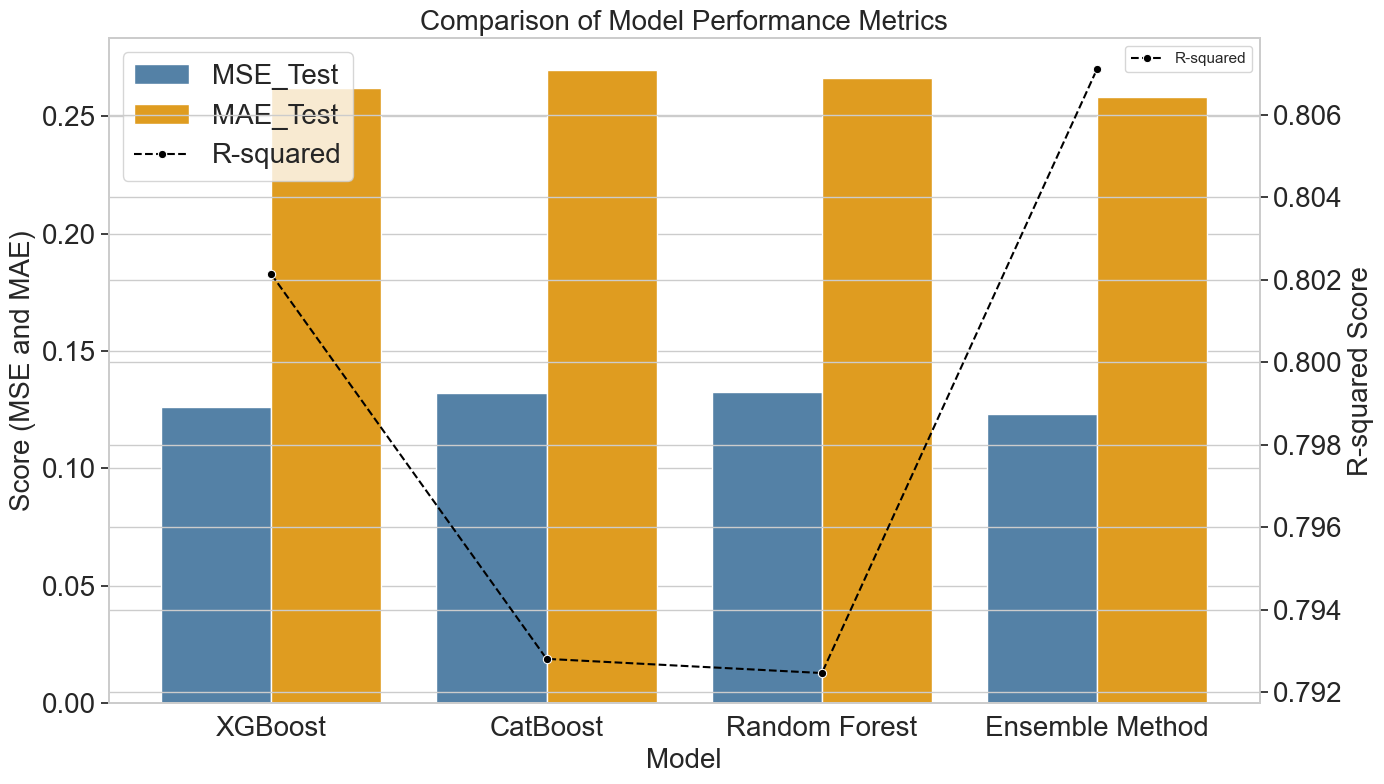

In [ ]:
# Prepare data for melting
performance_df_long = performance_df[['MSE_Test', 'MAE_Test', 'R2_Test']].copy()
performance_df_long.reset_index(inplace=True)
performance_df_long = performance_df_long.melt(id_vars='index', 
                                               value_vars=['MSE_Test', 'MAE_Test'],
                                               var_name='Metric',
                                               value_name='Score')
performance_df_long = performance_df_long.rename(columns={'index': 'Model'})

# Prepare a separate DataFrame for R2_Test
r2_df = performance_df[['R2_Test']].copy()
r2_df.reset_index(inplace=True)
r2_df = r2_df.rename(columns={'R2_Test': 'Score', 'index': 'Model'})
r2_df['Metric'] = 'R2_Test'

# Combine the two DataFrames for plotting
combined_df = pd.concat([performance_df_long, r2_df])

# Set up the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot MSE and MAE on the primary y-axis with custom colors
colors = {'MSE_Test': 'steelblue', 'MAE_Test': 'orange'}
sns.barplot(x='Model', y='Score', hue='Metric', data=performance_df_long, ax=ax1, palette=colors)
ax1.set_xlabel('Model', fontsize=20)
ax1.set_ylabel('Score (MSE and MAE)', fontsize=20)
ax1.tick_params(axis='y', labelsize=20)

# Create a secondary y-axis for R-squared
ax2 = ax1.twinx()
sns.lineplot(x='Model', y='Score', data=r2_df, ax=ax2, color='black', marker='o', linestyle='--', label='R-squared')
ax2.set_ylabel('R-squared Score', fontsize=20)
ax2.tick_params(axis='y', labelsize=20)

# Add title and adjust layout
ax1.set_title('Comparison of Model Performance Metrics', fontsize=20)
ax1.tick_params(axis='x', labelsize=20)  # Increase the size of x-axis labels

fig.tight_layout()

# Add legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
# Ensure R-squared is included in the legend
handles = handles1 + handles2
labels = labels1 + labels2
ax1.legend(handles=handles, labels=labels, loc='upper left', fontsize=20)

# Show plot
plt.show()


In [ ]:
# Predict using the ensemble model
y_test_pred = ensemble_model.predict(X_test)
y_test_pred_expm1 = np.expm1(y_test_pred)

# Print the last prediction
print(f"Last prediction of loan amount using expm1: {y_test_pred_expm1}")


Last prediction of loan amount using expm1: [ 76409.4144031  571063.63852183  61950.64468323 ... 198608.16702556
 196063.21361529 133778.23580367]
